## Analysis of The World Bank's World Development Indicators 

#### The purpose of this portfolio is to train machine learning models to predict the Life Expectancy of an individual at birth using World Development Indicators.

The life expectancy of an individual will be predicted using The World Bank's World Development Indicators (WDI) database.

The purpose of this portfolio is to explore and visualise the WDI database, clean the data, discuss correlations between features, produce various machine learning models, analyse these models and assess their effectiveness in predicting Life Expectancy based on the World Development Indicators. 

Multiple machine learning models will be trained and analysed, including Logisitic Regression models, KNN models and Guassian Naive Bayes classifiers.

This portfolio will evaluate whether the Life Expectancy of an individual at birth can be accurately forecast using the World Development Indicators.

### Portfolio Structure
This portfolio is presented in 12 parts:

1. Exploring the dataset
2. Cleaning the dataset
3. Removing outliers
4. Exploring the cleaned dataset
5. Visualising the dataset
6. Exploring correlation between features
7. Training a Logistic Regression model
8. Using RFE to improve Logistic Regression model
9. Using Feature Importance to improve Logistic Regression model
10. Training a KNN model
11. Optimising KNN model by tuning hyperparameter k
12. Building a Gaussian Naive Bayes classifier

Visualisation and analysis evaluations have been conducted in each part where necessary.

### The Dataset
#### About The World Bank
[The World Bank](https://www.worldbank.org/en/home) is an international organisation owned by 187 countries that aims to reduce poverty by lending money and aid to help improve the standard of living in developing countries. 

<img src="https://149448276.v2.pressablecdn.com/wp-content/uploads/2019/02/world-bank-logo.png" width="400" height="200" />

The World Bank's [DataBank](https://databank.worldbank.org/) is also one of the world's largest research centres in global development and monitoring. Data is collected and compiled from internationally recognised databases and on site researchers to be made publically available resultand of the World Bank Open Data Initiative.

This organisation provides critical funding and knowledge to developing countries, and decisions that have international implications are made based on the data collected, analysed and presented by data specialists. 

Data-driven decision making allows The World Bank to help countries by:
* Supplying safe drinking water
* Building schools and train teachers
* Increasing agricultural productivity
* Managing forests and other natural resources
* Building and maintaining roads, railways, and ports
* Extending telecommunications networks
* Generating and distributing energy
* Expanding health care
* Modernisation


#### About The World Development Indicators
The [World Development Indicators](https://databank.worldbank.org/source/world-development-indicators) are The World Bank's primary compilation of international statistics on global development. 
It presents the most current and accurate global development data available, and includes national, regional and global information.

This data has a direct impact on global decision making, including on the Sustainable Development Goals. The World Development Indicators are actively used to monitor progress towards these 17 goals which have 169 quantitative targets to be met by 2030.

This real-world database has quantifiable impacts on global development and has been instrumental in measuring the World's economy and progress towards improving lives, achieving sustanable development, supporting vulnerable populations, reducing gender disparities, monitoring migration and civil unrest, controlling the flow of resources globally and aiding those living in severe poverty.

#### About The Data
The World Development Indicators Database contains 1477 different series of data that have been tracked in 266 Countries, Regions and Territories since 1960. 

I have chosen to analyse 20 of these features (including Year, Country and Life Expectancy), all of which come from the 55 primary indicators within the 1477 different features. I have also chosen to remove Continents and Regions from the dataset, as they are the aggregate results of existing records. 

#### Description of Fields:

* __Agriculture__ - Agriculture, forestry, and fishing, value added (% of GDP)
* __Exports__ - Exports of goods and services (% of GDP)
* __FertilityRate__ - Fertility rate, total (births per woman)
* __GDP__ - GDP (current USD)
* __Immunisation__ - Immunization, measles (% of children ages 12-23 months)
* __Imports__ - Imports of goods and services (% of GDP)
* __Industry__ - Industry (including construction), value added (% of GDP)
* __Inflation__ - Inflation, GDP deflator (annual %)
* __MerchandiseTrade__ - Merchandise trade (% of GDP)
* __MilitaryExpendature__ - Military expenditure (% of GDP)
* __MortalityRateU5__ - Mortality rate, under-5 (per 1,000 live births)
* __NetMigration__ - Number of immigrants minus the number of emigrants, including citizens and noncitizens
* __DevelopmentAssistanceAndAid__ - Net official development assistance and official aid received (current USD)
* __PopulationDensity__ - Population density (people per sq. km of land area)
* __PopulationGrowth__ - Population growth (annual %)
* __PrimarySchoolEnrollment__ - School enrollment, primary (% gross)
* __UrbanPopulationGrowth__ - Urban population growth (annual %)
* __LifeExpectancy__ - Life expectancy at birth, total (years)

For more information about how this data is collected, please refer to the World Development Indicators [Metadata](https://datacatalog.worldbank.org/search/dataset/0037712/World-Development-Indicators).

In [2]:
# Import Library   

import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score

import matplotlib.pylab as plt
%matplotlib inline


# Import ignore warnings 

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load WorldDevelopmentIndicators.csv data into this notebook

df = pd.read_csv("files/WorldDevelopmentIndicators.csv")

## 1. Exploring the dataset

#### Dataset shape and features

In [5]:
# Printing the length of the dataset

print('Length of the dataset: ', len(df))

Length of the dataset:  13671


In [6]:
# Displaying the dataset using the method head()

df.head()

,Country,Year,Agriculture,Exports,FertilityRate,GDP,Immunisation,Imports,Industry,Inflation,MerchandiseTrade,MilitaryExpenditure,MortalityRateU5,NetMigration,DevelopmentAssistanceAndAid,PopulationDensity,PopulationGrowth,PrimarySchoolEnrollment,UrbanPopulationGrowth,LifeExpectancy
0,Argentina,1960,NaN,7.604049,3.075,NaN,NaN,7.604047,NaN,NaN,NaN,1.55,NaN,20399.0,4.405000e+07,NaN,NaN,NaN,NaN,63.978
1,Argentina,1961,NaN,5.994947,3.069,NaN,NaN,5.994945,NaN,20.310698,NaN,2.14,NaN,29321.0,5.479000e+07,7.556812,1.613029,NaN,2.432905,64.360
2,Argentina,1962,NaN,4.691843,3.106,2.445060e+10,NaN,9.383683,NaN,28.871842,10.523257,2.66,NaN,29386.0,5.516000e+07,7.680943,1.629282,NaN,2.367622,64.244
3,Argentina,1963,NaN,7.890454,3.101,1.827212e+10,NaN,7.890452,NaN,25.591154,12.839230,1.68,NaN,30637.0,2.787000e+07,7.806517,1.621661,NaN,2.343967,64.449
4,Argentina,1964,NaN,5.563716,3.080,2.560525e+10,NaN,5.563714,NaN,28.774617,9.712852,1.15,NaN,32322.0,-5.290000e+06,7.932388,1.599523,NaN,2.307416,64.363


In [7]:
# Displaying the dataframe before cleaning

df

,Country,Year,Agriculture,Exports,FertilityRate,GDP,Immunisation,Imports,Industry,Inflation,MerchandiseTrade,MilitaryExpenditure,MortalityRateU5,NetMigration,DevelopmentAssistanceAndAid,PopulationDensity,PopulationGrowth,PrimarySchoolEnrollment,UrbanPopulationGrowth,LifeExpectancy
0,Argentina,1960,NaN,7.604049,3.075,NaN,NaN,7.604047,NaN,NaN,NaN,1.550000,NaN,20399.0,4.405000e+07,NaN,NaN,NaN,NaN,63.978
1,Argentina,1961,NaN,5.994947,3.069,NaN,NaN,5.994945,NaN,20.310698,NaN,2.140000,NaN,29321.0,5.479000e+07,7.556812,1.613029,NaN,2.432905,64.360
2,Argentina,1962,NaN,4.691843,3.106,2.445060e+10,NaN,9.383683,NaN,28.871842,10.523257,2.660000,NaN,29386.0,5.516000e+07,7.680943,1.629282,NaN,2.367622,64.244
3,Argentina,1963,NaN,7.890454,3.101,1.827212e+10,NaN,7.890452,NaN,25.591154,12.839230,1.680000,NaN,30637.0,2.787000e+07,7.806517,1.621661,NaN,2.343967,64.449
4,Argentina,1964,NaN,5.563716,3.080,2.560525e+10,NaN,5.563714,NaN,28.774617,9.712852,1.150000,NaN,32322.0,-5.290000e+06,7.932388,1.599523,NaN,2.307416,64.363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13666,Zimbabwe,2018,7.319375,26.163973,3.659,3.415607e+10,88.0,28.386297,31.037898,200.769578,30.588999,1.137810,53.7,-59918.0,7.945600e+08,38.909614,2.020537,97.750809,1.933653,61.414
13667,Zimbabwe,2019,9.819262,27.163459,3.599,2.183223e+10,85.0,25.524111,32.025947,225.394648,41.617361,0.729567,52.7,-59918.0,8.440900e+08,39.691374,1.989253,97.140213,1.992351,61.292
13668,Zimbabwe,2020,8.772859,25.917014,3.545,2.150970e+10,85.0,28.733547,32.767517,604.945864,43.691919,0.261761,51.8,-29955.0,9.846000e+08,40.505793,2.031112,97.304909,2.130421,61.124
13669,Zimbabwe,2021,8.849899,25.411446,3.491,2.837124e+10,85.0,30.901234,28.805586,113.294981,47.837178,0.815977,49.5,-25005.0,9.743900e+08,41.342960,2.045715,96.117836,2.234724,59.253


In [8]:
# Displaying a summary of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13671 entries, 0 to 13670
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      13671 non-null  object 
 1   Year                         13671 non-null  int64  
 2   Agriculture                  8485 non-null   float64
 3   Exports                      8701 non-null   float64
 4   FertilityRate                12903 non-null  float64
 5   GDP                          10548 non-null  float64
 6   Immunisation                 7353 non-null   float64
 7   Imports                      8710 non-null   float64
 8   Industry                     8427 non-null   float64
 9   Inflation                    10018 non-null  float64
 10  MerchandiseTrade             9974 non-null   float64
 11  MilitaryExpenditure          7570 non-null   float64
 12  MortalityRateU5              11129 non-null  float64
 13  NetMigration    

In [9]:
# Printing the number of countries in the dataset

print('Number of countries:', len(df['Country'].unique()))

Number of countries: 217


In [10]:
# Printing the number of years the data has been collected across

print('Number of years:', len(df['Year'].unique()))

Number of years: 63


In [11]:
# Displaying the dimensions of the dataset before cleaning

df.shape

(13671, 20)

This dataset contains 20 features (columns) and 13671 rows of data. Data has been collected in 217 Countries over the last 63 years. The majority of columns contain null values, with the exception of 'Country' and 'Year'.

#### Life expectancy over the years - exploring the dataset

In [12]:
# Displaying descriptive statistics for Life Expectancy

df['LifeExpectancy'].describe()

count    12890.000000
mean        64.713964
std         11.284730
min         11.995000
25%         57.648000
50%         67.551500
75%         73.000890
max         85.497561
Name: LifeExpectancy, dtype: float64

In [13]:
# Displaying the country with the lowest life expectancy across all years

LifeExpectancyMin = df['LifeExpectancy'].min()
print(df.loc[df['LifeExpectancy'] == LifeExpectancyMin, ['Country', 'Year', 'LifeExpectancy']])

       Country  Year  LifeExpectancy
3165  Cambodia  1975          11.995


In [14]:
# Displaying the country with the highest life expectancy across all years

LifeExpectancyMax = df['LifeExpectancy'].max()
print(df.loc[df['LifeExpectancy'] == LifeExpectancyMax, ['Country', 'Year', 'LifeExpectancy']])

                   Country  Year  LifeExpectancy
6360  Hong Kong SAR, China  2020       85.497561


In [15]:
# Displaying the country with the lowest life expectancy in 2020

Data2020 = df.loc[df['Year'] == 2020]
LifeExpectancyMin2020 = Data2020['LifeExpectancy'].min()
print(df.loc[df['LifeExpectancy'] == LifeExpectancyMin2020, ['Country', 'Year', 'LifeExpectancy']])

     Country  Year  LifeExpectancy
3525    Chad  2020          52.777


In [16]:
# Displaying the country with the highest life expectancy in 2020

Data2020 = df.loc[df['Year'] == 2020]
LifeExpectancyMax2020 = Data2020['LifeExpectancy'].max()
print(df.loc[df['LifeExpectancy'] == LifeExpectancyMax2020, ['Country', 'Year', 'LifeExpectancy']])

                   Country  Year  LifeExpectancy
6360  Hong Kong SAR, China  2020       85.497561


#### Life expectancy at a glance

The average life expectancy of an individual over between 1960-2023 is 64.713964.

The lowest life expectancy recorded in this database is Cambodia in 1975, where people had a life expectancy of 11.995.

The highest life expectancy recorded in this database is Hong Kong and China in 2020, where people had a life expectancy of 85.497561.

The lowest life expectancy in 2020 was Chad, where people had a life expectancy at birth of 52.777.

The highest life expectancy in 2020 was Hong Kong and China, where people had a life expectancy of 85.497561, the highest ever recorded.

## 2. Cleaning the dataset

#### Removing records with null values

In [17]:
# Printing the length of the dataset before cleaning

print('Length of the dataset before cleaning: ', len(df))

Length of the dataset before cleaning:  13671


In [18]:
# Counting the number of null values in each column

print('Number of null values in Country:', df['Country'].isna().sum())
print('Number of null values in Year:', df['Year'].isna().sum())
print('Number of null values in Agriculture:', df['Agriculture'].isna().sum())
print('Number of null values in Exports:', df['Exports'].isna().sum())
print('Number of null values in FertilityRate:', df['FertilityRate'].isna().sum())
print('Number of null values in GDP:', df['GDP'].isna().sum())
print('Number of null values in Immunisation:', df['Immunisation'].isna().sum())
print('Number of null values in Imports:', df['Imports'].isna().sum())
print('Number of null values in Industry:', df['Industry'].isna().sum())
print('Number of null values in Inflation:', df['Inflation'].isna().sum())
print('Number of null values in MerchandiseTrade:', df['MerchandiseTrade'].isna().sum())
print('Number of null values in MilitaryExpenditure:', df['MilitaryExpenditure'].isna().sum())
print('Number of null values in MortalityRateU5:', df['MortalityRateU5'].isna().sum())
print('Number of null values in NetMigration:', df['NetMigration'].isna().sum())
print('Number of null values in DevelopmentAssistanceAndAid:', df['DevelopmentAssistanceAndAid'].isna().sum())
print('Number of null values in PopulationDensity:', df['PopulationDensity'].isna().sum())
print('Number of null values in PopulationGrowth:', df['PopulationGrowth'].isna().sum())
print('Number of null values in PrimarySchoolEnrollment:', df['PrimarySchoolEnrollment'].isna().sum())
print('Number of null values in UrbanPopulationGrowth:', df['UrbanPopulationGrowth'].isna().sum())
print('Number of null values in LifeExpectancy:', df['LifeExpectancy'].isna().sum())

Number of null values in Country: 0
Number of null values in Year: 0
Number of null values in Agriculture: 5186
Number of null values in Exports: 4970
Number of null values in FertilityRate: 768
Number of null values in GDP: 3123
Number of null values in Immunisation: 6318
Number of null values in Imports: 4961
Number of null values in Industry: 5244
Number of null values in Inflation: 3653
Number of null values in MerchandiseTrade: 3697
Number of null values in MilitaryExpenditure: 6101
Number of null values in MortalityRateU5: 2542
Number of null values in NetMigration: 217
Number of null values in DevelopmentAssistanceAndAid: 4752
Number of null values in PopulationDensity: 1698
Number of null values in PopulationGrowth: 248
Number of null values in PrimarySchoolEnrollment: 5694
Number of null values in UrbanPopulationGrowth: 371
Number of null values in LifeExpectancy: 781


In [19]:
# Removing records where values are missing

clean_df = df.dropna(subset=['Agriculture', 
                             'Exports', 
                             'FertilityRate', 
                             'GDP', 
                             'Immunisation', 
                             'Imports', 
                             'Industry', 
                             'Inflation', 
                             'MerchandiseTrade', 
                             'MilitaryExpenditure', 
                             'MortalityRateU5', 
                             'NetMigration', 
                             'DevelopmentAssistanceAndAid', 
                             'PopulationDensity', 
                             'PopulationGrowth', 
                             'PrimarySchoolEnrollment', 
                             'UrbanPopulationGrowth', 
                             'LifeExpectancy'])

In [20]:
# Printing the length of the dataset after cleaning

print('Length of the dataset after cleaning: ', len(clean_df))

Length of the dataset after cleaning:  3042


In [21]:
# Displaying a summary of the cleaned dataset

clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3042 entries, 20 to 13669
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      3042 non-null   object 
 1   Year                         3042 non-null   int64  
 2   Agriculture                  3042 non-null   float64
 3   Exports                      3042 non-null   float64
 4   FertilityRate                3042 non-null   float64
 5   GDP                          3042 non-null   float64
 6   Immunisation                 3042 non-null   float64
 7   Imports                      3042 non-null   float64
 8   Industry                     3042 non-null   float64
 9   Inflation                    3042 non-null   float64
 10  MerchandiseTrade             3042 non-null   float64
 11  MilitaryExpenditure          3042 non-null   float64
 12  MortalityRateU5              3042 non-null   float64
 13  NetMigration    

In [22]:
# Counting the number of null values in each column after cleaning

print('Number of null values in Country:', clean_df['Country'].isna().sum())
print('Number of null values in Year:', clean_df['Year'].isna().sum())
print('Number of null values in Agriculture:', clean_df['Agriculture'].isna().sum())
print('Number of null values in Exports:', clean_df['Exports'].isna().sum())
print('Number of null values in FertilityRate:', clean_df['FertilityRate'].isna().sum())
print('Number of null values in GDP:', clean_df['GDP'].isna().sum())
print('Number of null values in Immunisation:', clean_df['Immunisation'].isna().sum())
print('Number of null values in Imports:', clean_df['Imports'].isna().sum())
print('Number of null values in Industry:', clean_df['Industry'].isna().sum())
print('Number of null values in Inflation:', clean_df['Inflation'].isna().sum())
print('Number of null values in MerchandiseTrade:', clean_df['MerchandiseTrade'].isna().sum())
print('Number of null values in MilitaryExpenditure:', clean_df['MilitaryExpenditure'].isna().sum())
print('Number of null values in MortalityRateU5:', clean_df['MortalityRateU5'].isna().sum())
print('Number of null values in NetMigration:', clean_df['NetMigration'].isna().sum())
print('Number of null values in DevelopmentAssistanceAndAid:', clean_df['DevelopmentAssistanceAndAid'].isna().sum())
print('Number of null values in PopulationDensity:', clean_df['PopulationDensity'].isna().sum())
print('Number of null values in PopulationGrowth:', clean_df['PopulationGrowth'].isna().sum())
print('Number of null values in PrimarySchoolEnrollment:', clean_df['PrimarySchoolEnrollment'].isna().sum())
print('Number of null values in UrbanPopulationGrowth:', clean_df['UrbanPopulationGrowth'].isna().sum())
print('Number of null values in LifeExpectancy:', clean_df['LifeExpectancy'].isna().sum())

Number of null values in Country: 0
Number of null values in Year: 0
Number of null values in Agriculture: 0
Number of null values in Exports: 0
Number of null values in FertilityRate: 0
Number of null values in GDP: 0
Number of null values in Immunisation: 0
Number of null values in Imports: 0
Number of null values in Industry: 0
Number of null values in Inflation: 0
Number of null values in MerchandiseTrade: 0
Number of null values in MilitaryExpenditure: 0
Number of null values in MortalityRateU5: 0
Number of null values in NetMigration: 0
Number of null values in DevelopmentAssistanceAndAid: 0
Number of null values in PopulationDensity: 0
Number of null values in PopulationGrowth: 0
Number of null values in PrimarySchoolEnrollment: 0
Number of null values in UrbanPopulationGrowth: 0
Number of null values in LifeExpectancy: 0


In [23]:
# Displaying the dataframe after cleaning

clean_df

,Country,Year,Agriculture,Exports,FertilityRate,GDP,Immunisation,Imports,Industry,Inflation,MerchandiseTrade,MilitaryExpenditure,MortalityRateU5,NetMigration,DevelopmentAssistanceAndAid,PopulationDensity,PopulationGrowth,PrimarySchoolEnrollment,UrbanPopulationGrowth,LifeExpectancy
20,Argentina,1980,6.353505,5.061973,3.301,7.696192e+10,61.0,6.483700,41.219666,95.790425,24.118420,3.098958,42.9,-3466.0,4.368000e+07,10.240401,1.584919,106.895767,2.033519,68.564
21,Argentina,1981,6.475523,6.921049,3.253,7.867684e+10,77.0,7.371928,40.338227,105.276366,23.606692,3.465347,39.4,10366.0,3.683000e+07,10.403548,1.580610,107.608009,2.093249,68.976
22,Argentina,1982,9.596156,9.090493,3.204,8.430749e+10,67.0,6.520993,41.102849,194.535300,15.374673,2.704558,36.5,19326.0,2.949000e+07,10.568520,1.573286,107.836998,2.107187,68.937
24,Argentina,1984,8.345977,7.589895,3.123,1.170000e+11,79.0,4.756486,39.708188,611.196304,10.855745,2.162039,32.1,30810.0,3.274000e+07,10.900832,1.537153,106.028717,2.043030,69.195
25,Argentina,1985,7.634307,11.736098,3.095,8.815089e+10,54.0,6.273327,39.276155,607.447498,13.851250,2.299717,30.6,31967.0,3.908000e+07,11.067060,1.513403,106.174377,2.004979,69.651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13665,Zimbabwe,2017,8.340969,19.658905,3.706,1.758489e+10,90.0,30.370807,21.404999,3.056905,48.592852,1.592340,56.2,-59918.0,7.258400e+08,38.131320,2.043620,98.933189,1.860765,60.709
13666,Zimbabwe,2018,7.319375,26.163973,3.659,3.415607e+10,88.0,28.386297,31.037898,200.769578,30.588999,1.137810,53.7,-59918.0,7.945600e+08,38.909614,2.020537,97.750809,1.933653,61.414
13667,Zimbabwe,2019,9.819262,27.163459,3.599,2.183223e+10,85.0,25.524111,32.025947,225.394648,41.617361,0.729567,52.7,-59918.0,8.440900e+08,39.691374,1.989253,97.140213,1.992351,61.292
13668,Zimbabwe,2020,8.772859,25.917014,3.545,2.150970e+10,85.0,28.733547,32.767517,604.945864,43.691919,0.261761,51.8,-29955.0,9.846000e+08,40.505793,2.031112,97.304909,2.130421,61.124


In [24]:
# Printing the shape of the dataset after cleaning 

clean_df.shape

(3042, 20)

## 3. Removing outliers

#### Removing any data collected prior to 1985

Data collected to 1985 was not subject to the same data authentication process as data collected from 1985 onwards. International organisations have also expressed concern that data prior to this date in certain Countries and Regions may have been tampered with, corrupted and/or falsified due to the political, economic, social and civil status in poverty stricken areas. 

In [25]:
# Printing the length of the dataset before removing outliers

print('Length of the dataset before removing outliers: ', len(clean_df))

Length of the dataset before removing outliers:  3042


In [26]:
# Printing the number of records in each 5 year timespan (and prior to 1980)

print('Number of records in 1960-1979:', len(clean_df[(clean_df.Year >= 1960) & (clean_df.Year < 1980)]))
print('Number of records in 1980-1984:', len(clean_df[(clean_df.Year >= 1980) & (clean_df.Year < 1985)]))
print('Number of records in 1985-1989:', len(clean_df[(clean_df.Year >= 1985) & (clean_df.Year < 1990)]))
print('Number of records in 1990-1994:', len(clean_df[(clean_df.Year >= 1990) & (clean_df.Year < 1995)]))
print('Number of records in 1995-1999:', len(clean_df[(clean_df.Year >= 1995) & (clean_df.Year < 2000)]))
print('Number of records in 2000-2004:', len(clean_df[(clean_df.Year >= 2000) & (clean_df.Year < 2005)]))
print('Number of records in 2005-2009:', len(clean_df[(clean_df.Year >= 2005) & (clean_df.Year < 2010)]))
print('Number of records in 2010-2014:', len(clean_df[(clean_df.Year >= 2010) & (clean_df.Year < 2015)]))
print('Number of records in 2015-2019:', len(clean_df[(clean_df.Year >= 2015) & (clean_df.Year < 2020)]))
print('Number of records in 2020-2024:', len(clean_df[(clean_df.Year >= 2020) & (clean_df.Year < 2025)]))

Number of records in 1960-1979: 0
Number of records in 1980-1984: 188
Number of records in 1985-1989: 295
Number of records in 1990-1994: 348
Number of records in 1995-1999: 413
Number of records in 2000-2004: 477
Number of records in 2005-2009: 416
Number of records in 2010-2014: 412
Number of records in 2015-2019: 392
Number of records in 2020-2024: 101


In [27]:
# Identifying records collected prior to 1985

before1985 = (clean_df['Year']) < 1985

In [28]:
# Removing records collected prior to 1985

clean_df_2 = clean_df.drop(clean_df.index[before1985])

In [29]:
# Printing the length of the dataset after removing outliers

print('Length of the dataset after removing outliers: ', len(clean_df_2))

Length of the dataset after removing outliers:  2854


In [30]:
# Saving the cleaned dataset as a new file

clean_df_2.to_csv('files/WorldDevelopmentIndicatorsClean.csv', index=False)

Any records collected prior to 1985 have been removed, and the clean dataset has been saved as a new csv file.

# 4. Exploring the cleaned dataset

In [31]:
# Loading csv data into df

df = pd.read_csv("files/WorldDevelopmentIndicatorsClean.csv")

In [32]:
# Printing the length of the dataset

print('Length of the cleaned WorldDevelopmentIndicators dataset: ', len(df))

Length of the cleaned WorldDevelopmentIndicators dataset:  2854


In [329]:
# Displaying the dataframe of the cleaned WorldDevelopmentIndicators dataset

df

,Country,Year,Agriculture,Exports,FertilityRate,GDP,Immunisation,Imports,Industry,Inflation,MerchandiseTrade,MilitaryExpenditure,MortalityRateU5,NetMigration,DevelopmentAssistanceAndAid,PopulationDensity,PopulationGrowth,PrimarySchoolEnrollment,UrbanPopulationGrowth,LifeExpectancy
0,Argentina,1985,7.634307,11.736098,3.095,8.815089e+10,54.0,6.273327,39.276155,607.447498,13.851250,2.299717,30.6,31967.0,3.908000e+07,11.067060,1.513403,106.174377,2.004979,69.651
1,Argentina,1986,7.800403,8.161978,3.075,1.060000e+11,87.0,6.324055,37.380435,77.292237,10.933920,2.313679,29.6,32496.0,7.367000e+07,11.235590,1.511328,107.024521,1.988796,70.119
2,Argentina,1987,8.094358,7.873206,3.059,1.090000e+11,80.0,7.575764,37.828675,127.539918,11.191895,2.284387,29.1,32345.0,8.339000e+07,11.406646,1.510974,107.391808,1.975691,70.564
3,Argentina,1988,8.977868,9.531613,3.042,1.270000e+11,87.0,6.211846,38.486611,381.246344,11.393312,2.124939,29.0,30243.0,1.424800e+08,11.579971,1.508087,107.966347,1.961376,71.052
4,Argentina,1990,8.123676,10.359537,3.034,1.410000e+11,93.0,4.631322,36.021881,2078.316818,11.622706,1.450909,28.8,6021.0,1.716300e+08,11.925961,1.456403,106.912430,1.883831,71.784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2849,Zimbabwe,2017,8.340969,19.658905,3.706,1.758489e+10,90.0,30.370807,21.404999,3.056905,48.592852,1.592340,56.2,-59918.0,7.258400e+08,38.131320,2.043620,98.933189,1.860765,60.709
2850,Zimbabwe,2018,7.319375,26.163973,3.659,3.415607e+10,88.0,28.386297,31.037898,200.769578,30.588999,1.137810,53.7,-59918.0,7.945600e+08,38.909614,2.020537,97.750809,1.933653,61.414
2851,Zimbabwe,2019,9.819262,27.163459,3.599,2.183223e+10,85.0,25.524111,32.025947,225.394648,41.617361,0.729567,52.7,-59918.0,8.440900e+08,39.691374,1.989253,97.140213,1.992351,61.292
2852,Zimbabwe,2020,8.772859,25.917014,3.545,2.150970e+10,85.0,28.733547,32.767517,604.945864,43.691919,0.261761,51.8,-29955.0,9.846000e+08,40.505793,2.031112,97.304909,2.130421,61.124


In [330]:
# Displaying a summary of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2854 entries, 0 to 2853
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Country                      2854 non-null   object 
 1   Year                         2854 non-null   int64  
 2   Agriculture                  2854 non-null   float64
 3   Exports                      2854 non-null   float64
 4   FertilityRate                2854 non-null   float64
 5   GDP                          2854 non-null   float64
 6   Immunisation                 2854 non-null   float64
 7   Imports                      2854 non-null   float64
 8   Industry                     2854 non-null   float64
 9   Inflation                    2854 non-null   float64
 10  MerchandiseTrade             2854 non-null   float64
 11  MilitaryExpenditure          2854 non-null   float64
 12  MortalityRateU5              2854 non-null   float64
 13  NetMigration      

In [331]:
# Printing the number of countries in the dataset

print('Number of countries:', len(df['Country'].unique()))

Number of countries: 127


In [332]:
# Printing the number of years the data has been collected across

print('Number of years:', len(df['Year'].unique()))

Number of years: 37


In [333]:
# Displaying the number of records for each country

df.groupby(['Country'])['LifeExpectancy'].count().reset_index(name='Count')

,Country,Count
0,Albania,26
1,Algeria,22
2,Angola,9
3,Argentina,32
4,Armenia,10
...,...,...
122,"Venezuela, RB",27
123,Vietnam,24
124,"Yemen, Rep.",4
125,Zambia,18


In [334]:
# Displaying the number of records for each country in ascending order

(df.groupby(['Country'])['LifeExpectancy'].count().reset_index(name='Count')).sort_values("Count")

,Country,Count
57,Iraq,2
37,Equatorial Guinea,3
100,Saudi Arabia,4
82,Myanmar,4
124,"Yemen, Rep.",4
...,...,...
113,Thailand,36
101,Senegal,36
75,Mauritius,37
34,Ecuador,37


In [335]:
# Displaying descriptive statistics for Life Expectancy

df['LifeExpectancy'].describe()

count    2854.000000
mean       65.549785
std         8.632237
min        37.105000
25%        59.488250
50%        67.956463
75%        72.461555
max        80.350000
Name: LifeExpectancy, dtype: float64

#### The Cleaned World Development Indicators Dataset

The cleaned WorldDevelopmentIndicators dataset contains 2854 records. 

These records come from 127 different Countries and have been collected from 1985 onwards. 

Iraq has the smalled number of records in the cleaned dataset (2) and Mauritius, Ecuador and Morocco have the most records in the cleaned dataset (37).

The average life expectancy in the cleaned dataset is 65.549785.

## 5. Visualising the dataset

In [336]:
# Finding the average value for each Indicator each year to be graphed

byIndicator = df.groupby(['Year'])['Agriculture', 
            'Exports', 
            'FertilityRate', 
            'GDP', 
            'Immunisation', 
            'Imports', 
            'Industry', 
            'Inflation', 
            'MerchandiseTrade', 
            'MilitaryExpenditure', 
            'MortalityRateU5', 
            'NetMigration', 
            'DevelopmentAssistanceAndAid', 
            'PopulationDensity', 
            'PopulationGrowth', 
            'PrimarySchoolEnrollment', 
            'UrbanPopulationGrowth', 
            'LifeExpectancy'].mean()
byIndicator.head()

,Agriculture,Exports,FertilityRate,GDP,Immunisation,Imports,Industry,Inflation,MerchandiseTrade,MilitaryExpenditure,MortalityRateU5,NetMigration,DevelopmentAssistanceAndAid,PopulationDensity,PopulationGrowth,PrimarySchoolEnrollment,UrbanPopulationGrowth,LifeExpectancy
Year,,,,,,,,,,,,,,,,,,
1985,21.431279,28.765089,5.183390,2.564736e+10,45.508475,35.122328,28.476002,22.923711,49.877324,3.362828,104.566102,-16371.067797,2.460686e+08,111.816340,2.528645,90.742917,4.457512,60.456075
1986,21.563290,26.603447,5.130948,2.621173e+10,53.896552,31.726651,27.630594,16.555908,44.410269,3.319875,103.062069,-24990.620690,3.026764e+08,115.530256,2.541290,89.489096,4.391976,60.577959
1987,22.216543,28.270177,5.003065,2.588316e+10,57.419355,33.917081,27.292213,24.280032,46.964457,3.218990,99.974194,-19757.161290,3.146911e+08,118.478852,2.525664,89.145365,4.306295,60.818328
1988,21.940637,28.735674,4.854397,3.045533e+10,62.879310,33.463138,27.976196,29.103433,46.297062,3.272229,90.848276,-18935.775862,3.425552e+08,126.064536,2.488563,90.395103,4.153270,61.946415
1989,22.010300,30.954933,4.691397,3.575041e+10,70.120690,35.271167,28.921876,20.054663,51.597951,2.965653,91.553448,-29885.465517,3.977047e+08,128.382996,2.376390,91.011620,3.899412,61.850843


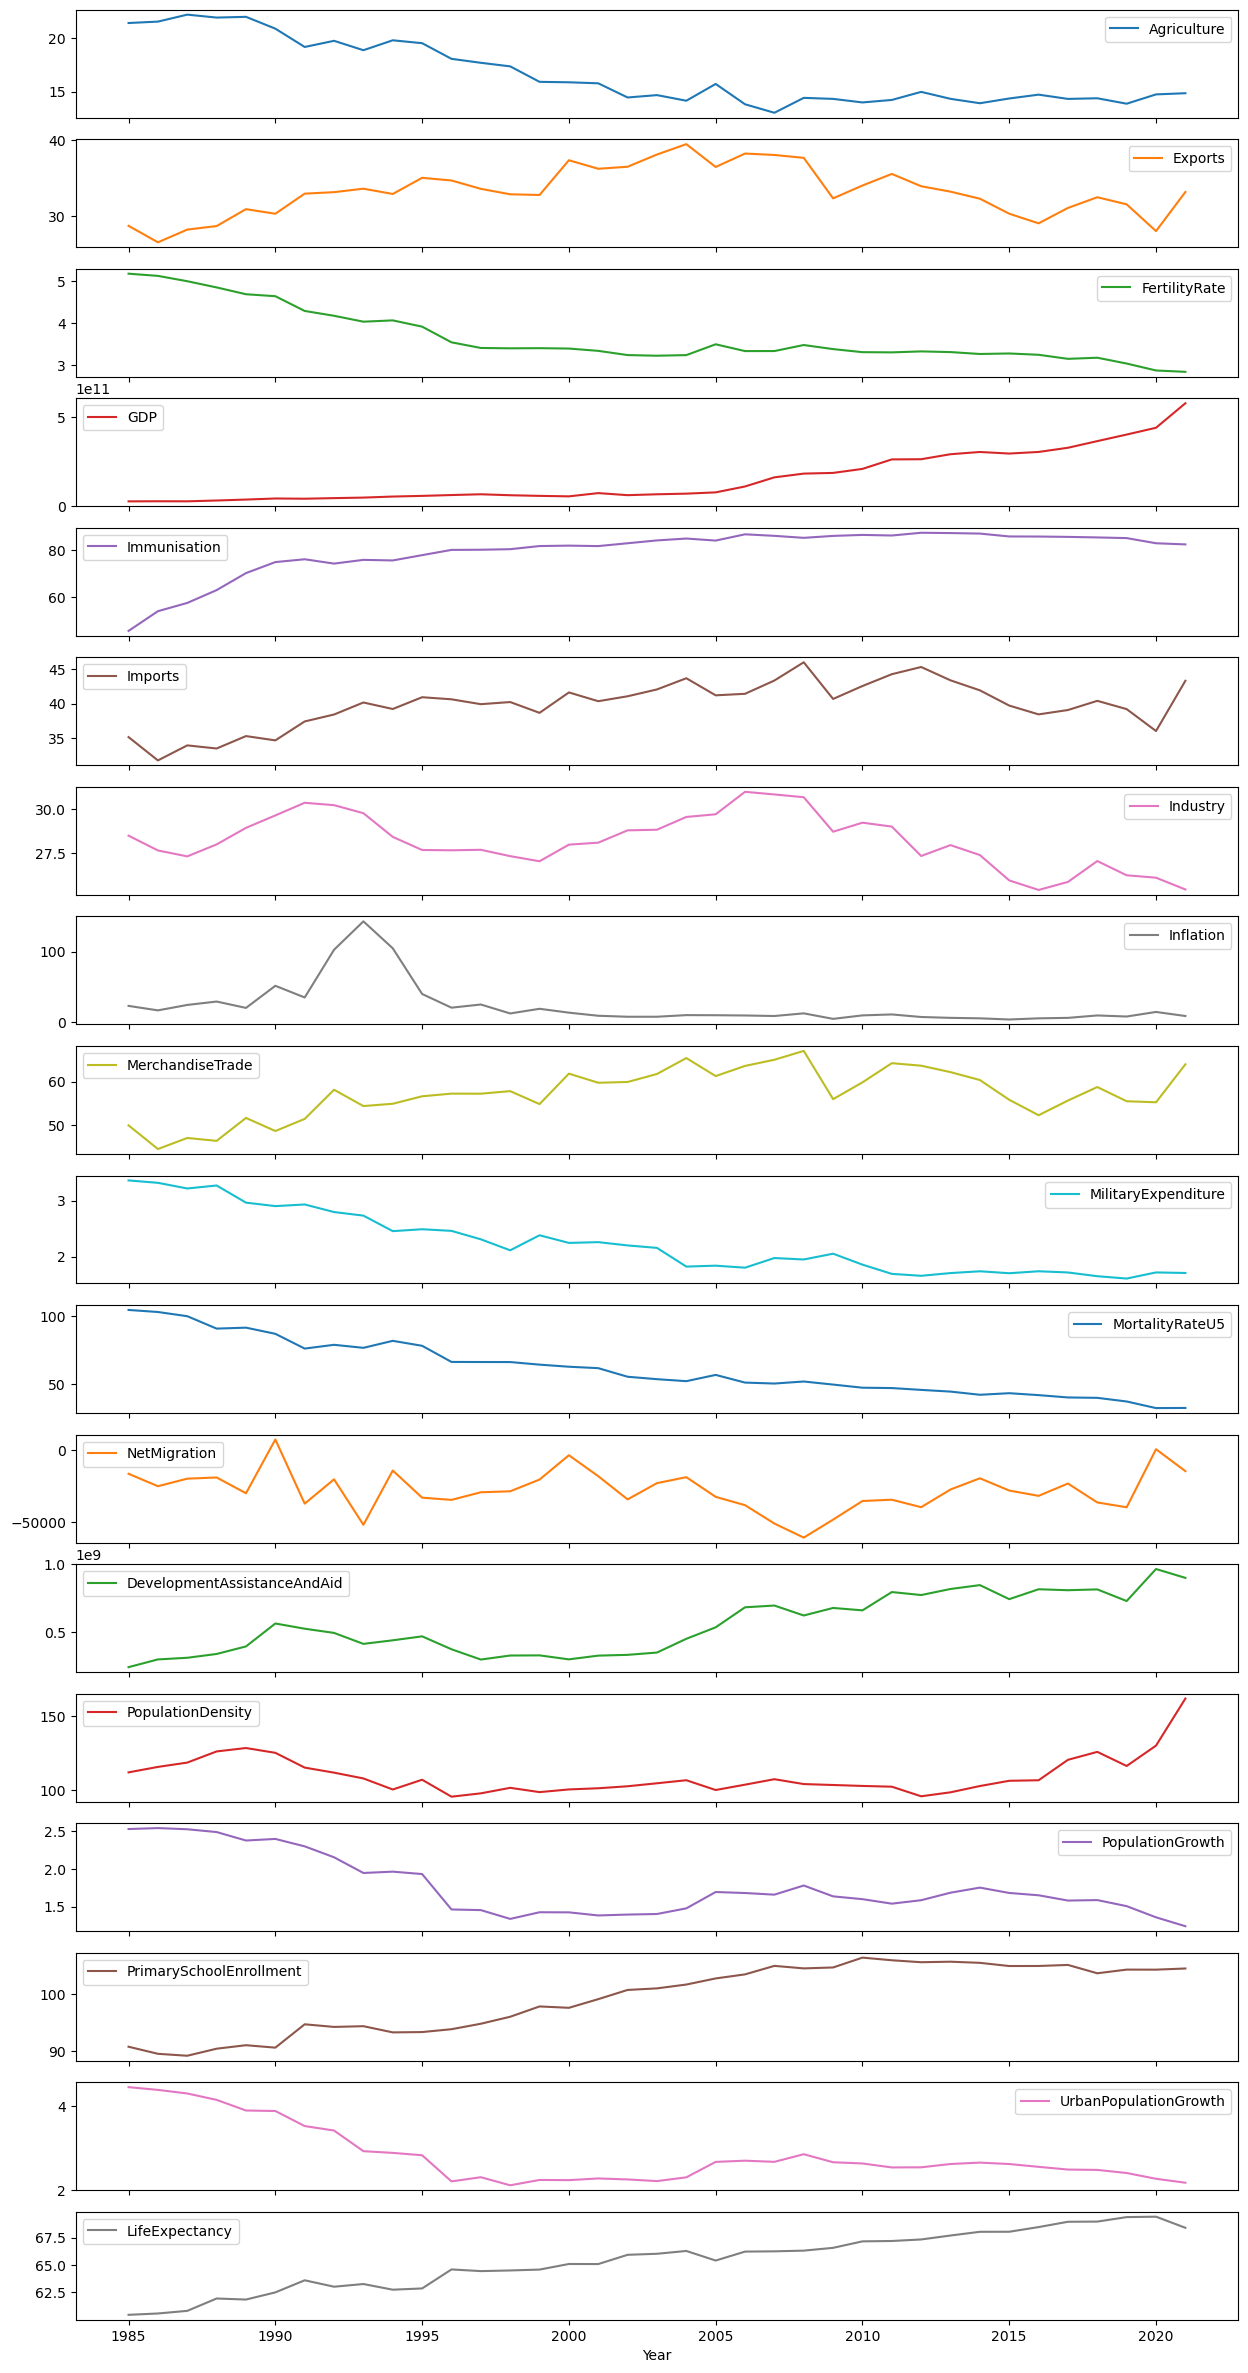

In [337]:
# Plotting the average trends of each Indicator over time

plt.rcParams.update(plt.rcParamsDefault)

byIndicator.plot.line(subplots = True, figsize = (15, 30),sharex = True)
plt.style.use('classic')
plt.show()

The general trends of each Indicator (feature of the dataset) can be seen in the above line graphs. 

Life expectancy has increased steadily since 1985, and Mortality rate of children under 5 has been steadily decreasing. 
By visual inspection, inflation peaked dramatically and then fell in the early 1990's which correlates with the recession of the early 1990's and resulting prolonged economic downturn. 

In [338]:
# Finding the average Life Expectancy for each Year each year to be graphed

byYear = df.groupby(['Year'])['LifeExpectancy'].mean().reset_index(name='MeanLifeExpectancy')
byYear.head()

,Year,MeanLifeExpectancy
0,1985,60.456075
1,1986,60.577959
2,1987,60.818328
3,1988,61.946415
4,1989,61.850843


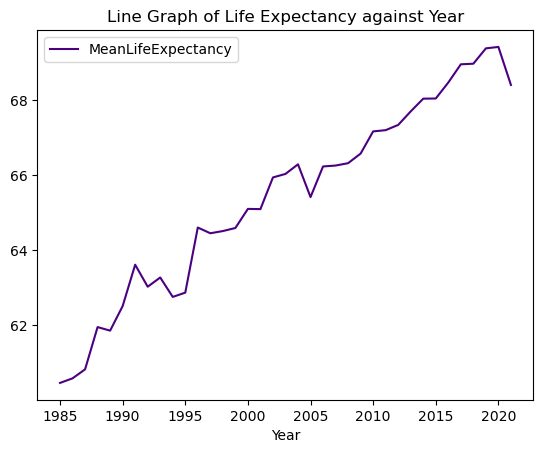

In [339]:
# Graphing life expectancy against year

plt.rcParams.update(plt.rcParamsDefault)

byYear.plot.line(x = 'Year', 
                 y = 'MeanLifeExpectancy', 
                 title = 'Line Graph of Life Expectancy against Year', 
                 color = 'indigo')
plt.style.use('classic')
plt.show()

Generally speaking, life expectancy has been increasing since 1985. More recently, life expectancy has begun to drop since 2020, which correlates with the start of the COVID-19 Global Pandemic, which has been associated with 14.9 million excess deaths globally between 2020 and 2021 [(WHO)](https://www.who.int/news/item/05-05-2022-14.9-million-excess-deaths-were-associated-with-the-covid-19-pandemic-in-2020-and-2021).

In [340]:
# Importing sns package

import seaborn as sns

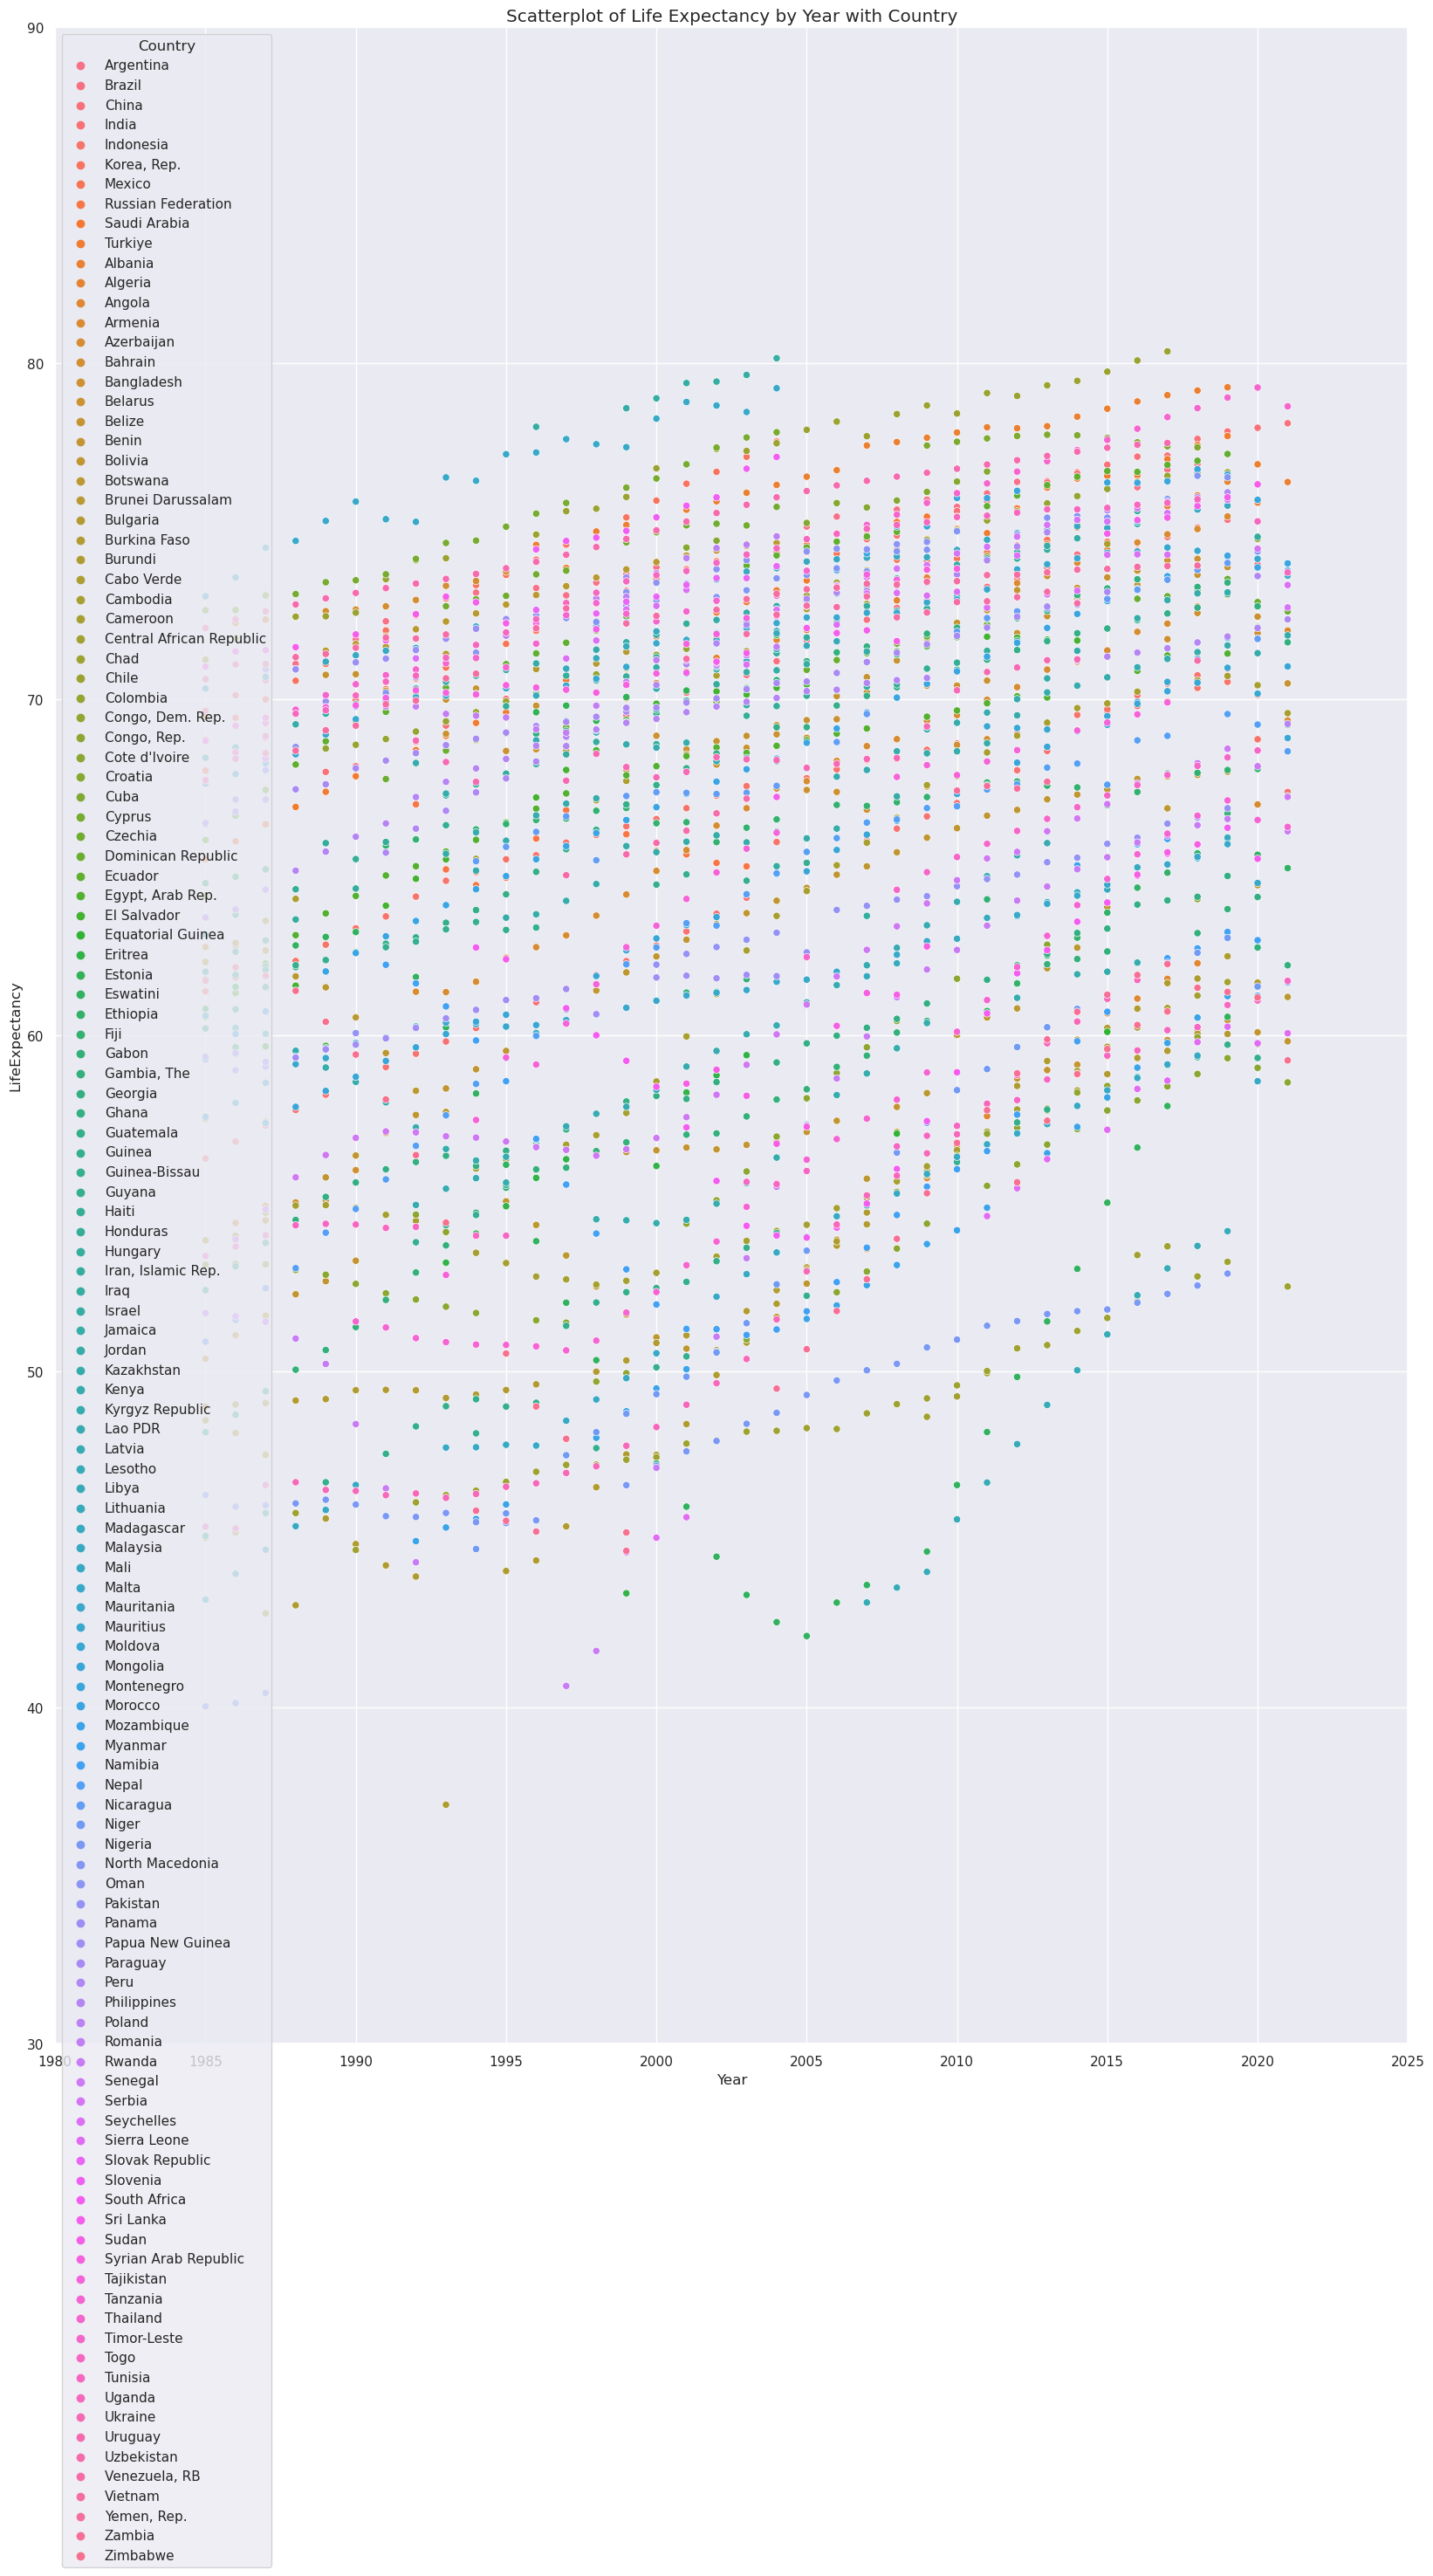

In [341]:
# Graphing Life expectancy and year by country

plt.rcParams.update(plt.rcParamsDefault)

sns.set(rc={'figure.figsize':(20,30)})
sns.scatterplot(data = df, 
                x = "Year", 
                y = "LifeExpectancy", 
                hue = "Country"
               #size="size", sizes=(20, 200), hue_norm=(0, 7), legend="full"
               )
plt.style.use('classic')
plt.title('Scatterplot of Life Expectancy by Year with Country')
plt.show()

The above seaborn scatterplot graphic is helpful in showing general trends in Life Expectancy data by country. It clearly shows the evident disparity in life expectancy between different countries whilst graphing the general upward trend of the feature on a global scale since 1985.

## 6. Exploring correlation between features

Transforming categorial data column 'Country' into numerical data column 'CountryCode' using OrdinalEncoder

In [342]:
# Displaying the head of the dataset

df.head()

,Country,Year,Agriculture,Exports,FertilityRate,GDP,Immunisation,Imports,Industry,Inflation,MerchandiseTrade,MilitaryExpenditure,MortalityRateU5,NetMigration,DevelopmentAssistanceAndAid,PopulationDensity,PopulationGrowth,PrimarySchoolEnrollment,UrbanPopulationGrowth,LifeExpectancy
0,Argentina,1985,7.634307,11.736098,3.095,8.815089e+10,54.0,6.273327,39.276155,607.447498,13.851250,2.299717,30.6,31967.0,3.908000e+07,11.067060,1.513403,106.174377,2.004979,69.651
1,Argentina,1986,7.800403,8.161978,3.075,1.060000e+11,87.0,6.324055,37.380435,77.292237,10.933920,2.313679,29.6,32496.0,7.367000e+07,11.235590,1.511328,107.024521,1.988796,70.119
2,Argentina,1987,8.094358,7.873206,3.059,1.090000e+11,80.0,7.575764,37.828675,127.539918,11.191895,2.284387,29.1,32345.0,8.339000e+07,11.406646,1.510974,107.391808,1.975691,70.564
3,Argentina,1988,8.977868,9.531613,3.042,1.270000e+11,87.0,6.211846,38.486611,381.246344,11.393312,2.124939,29.0,30243.0,1.424800e+08,11.579971,1.508087,107.966347,1.961376,71.052
4,Argentina,1990,8.123676,10.359537,3.034,1.410000e+11,93.0,4.631322,36.021881,2078.316818,11.622706,1.450909,28.8,6021.0,1.716300e+08,11.925961,1.456403,106.912430,1.883831,71.784


In [343]:
# Importing ordinal encoder

from sklearn.preprocessing import OrdinalEncoder

In [344]:
# Declaring ordinal encoder - datatype is integer

enc = OrdinalEncoder(dtype = int)

In [345]:
# Converting 'Country' to numerical data - creating column 'CountryCode'

df['CountryCode'] = enc.fit_transform(df[['Country']])

In [346]:
# Displaying the head of the dataset

df.head()

,Country,Year,Agriculture,Exports,FertilityRate,GDP,Immunisation,Imports,Industry,Inflation,...,MilitaryExpenditure,MortalityRateU5,NetMigration,DevelopmentAssistanceAndAid,PopulationDensity,PopulationGrowth,PrimarySchoolEnrollment,UrbanPopulationGrowth,LifeExpectancy,CountryCode
0,Argentina,1985,7.634307,11.736098,3.095,8.815089e+10,54.0,6.273327,39.276155,607.447498,...,2.299717,30.6,31967.0,3.908000e+07,11.067060,1.513403,106.174377,2.004979,69.651,3
1,Argentina,1986,7.800403,8.161978,3.075,1.060000e+11,87.0,6.324055,37.380435,77.292237,...,2.313679,29.6,32496.0,7.367000e+07,11.235590,1.511328,107.024521,1.988796,70.119,3
2,Argentina,1987,8.094358,7.873206,3.059,1.090000e+11,80.0,7.575764,37.828675,127.539918,...,2.284387,29.1,32345.0,8.339000e+07,11.406646,1.510974,107.391808,1.975691,70.564,3
3,Argentina,1988,8.977868,9.531613,3.042,1.270000e+11,87.0,6.211846,38.486611,381.246344,...,2.124939,29.0,30243.0,1.424800e+08,11.579971,1.508087,107.966347,1.961376,71.052,3
4,Argentina,1990,8.123676,10.359537,3.034,1.410000e+11,93.0,4.631322,36.021881,2078.316818,...,1.450909,28.8,6021.0,1.716300e+08,11.925961,1.456403,106.912430,1.883831,71.784,3


In [347]:
# Displaying 'Country' with new code column 'CountryCode'

df[["Country", "CountryCode"]]

,Country,CountryCode
0,Argentina,3
1,Argentina,3
2,Argentina,3
3,Argentina,3
4,Argentina,3
...,...,...
2849,Zimbabwe,126
2850,Zimbabwe,126
2851,Zimbabwe,126
2852,Zimbabwe,126


In [348]:
# Removing the 'Country' column which has now been replaced by 'CountryCode'

df = df.drop(columns = ['Country'])

#### Exploring correlations between features using .corr()

In [349]:
# Finding the correlations between all indicators

df[['Year',
    'CountryCode',
    'Agriculture', 
    'Exports', 
    'FertilityRate', 
    'GDP', 
    'Immunisation', 
    'Imports', 
    'Industry', 
    'Inflation', 
    'MerchandiseTrade', 
    'MilitaryExpenditure', 
    'MortalityRateU5', 
    'NetMigration', 
    'DevelopmentAssistanceAndAid', 
    'PopulationDensity', 
    'PopulationGrowth', 
    'PrimarySchoolEnrollment', 
    'UrbanPopulationGrowth',
    'LifeExpectancy']].corr()

,Year,CountryCode,Agriculture,Exports,FertilityRate,GDP,Immunisation,Imports,Industry,Inflation,MerchandiseTrade,MilitaryExpenditure,MortalityRateU5,NetMigration,DevelopmentAssistanceAndAid,PopulationDensity,PopulationGrowth,PrimarySchoolEnrollment,UrbanPopulationGrowth,LifeExpectancy
Year,1.000000,-0.023350,-0.205339,0.017027,-0.287745,0.143773,0.366104,0.082471,-0.055810,-0.123260,0.084693,-0.224245,-0.335127,-0.016393,0.220684,0.004289,-0.180492,0.277720,-0.199433,0.272214
CountryCode,-0.023350,1.000000,0.059957,-0.026952,0.009972,-0.072691,0.025424,0.020886,-0.066763,0.009887,-0.013648,-0.002816,-0.017809,0.008128,0.106373,0.003788,0.024982,0.014021,-0.021188,0.011625
Agriculture,-0.205339,0.059957,1.000000,-0.390169,0.652414,-0.106062,-0.515147,-0.193960,-0.477983,0.046692,-0.286533,-0.074352,0.700665,-0.079388,0.168863,-0.059926,0.371836,-0.366997,0.434106,-0.633983
Exports,0.017027,-0.026952,-0.390169,1.000000,-0.351411,-0.079841,0.252546,0.764997,0.391768,0.013339,0.831621,-0.021098,-0.381180,0.181661,-0.249810,0.111709,-0.173152,0.139361,-0.221945,0.297415
FertilityRate,-0.287745,0.009972,0.652414,-0.351411,1.000000,-0.153647,-0.642301,-0.234113,-0.265060,-0.060501,-0.309025,0.110004,0.863096,0.006645,0.128777,-0.166189,0.766135,-0.496604,0.724516,-0.820687
GDP,0.143773,-0.072691,-0.106062,-0.079841,-0.153647,1.000000,0.106832,-0.140092,0.116898,-0.014435,-0.085274,-0.028706,-0.118207,-0.108717,-0.007120,0.046827,-0.103273,0.035269,-0.036549,0.156262
Immunisation,0.366104,0.025424,-0.515147,0.252546,-0.642301,0.106832,1.000000,0.212928,0.156000,0.010348,0.258989,-0.007542,-0.709324,0.023297,-0.064817,0.033403,-0.422689,0.431795,-0.418243,0.621731
Imports,0.082471,0.020886,-0.193960,0.764997,-0.234113,-0.140092,0.212928,1.000000,0.006894,-0.014660,0.783413,0.017749,-0.260930,0.157221,-0.214325,0.125013,-0.167587,0.113438,-0.169244,0.172030
Industry,-0.055810,-0.066763,-0.477983,0.391768,-0.265060,0.116898,0.156000,0.006894,1.000000,0.076811,0.289908,0.146029,-0.296914,0.062196,-0.073329,-0.034718,-0.034258,0.169476,-0.063894,0.254358
Inflation,-0.123260,0.009887,0.046692,0.013339,-0.060501,-0.014435,0.010348,-0.014660,0.076811,1.000000,-0.004902,-0.014593,-0.011237,0.013352,-0.025719,-0.045580,-0.092924,0.029614,-0.108708,-0.007893


In [350]:
# Printing the correlation between all Indicators and Life expectancy

print('correlation between Year and LifeExpectancy:', df['Year'].corr(df['LifeExpectancy']))
print('correlation between CountryCode and LifeExpectancy:', df['CountryCode'].corr(df['LifeExpectancy']))
print('correlation between Agriculture and LifeExpectancy:', df['Agriculture'].corr(df['LifeExpectancy']))
print('correlation between Exports and LifeExpectancyy:', df['Exports'].corr(df['LifeExpectancy']))
print('correlation between FertilityRate and LifeExpectancy:', df['FertilityRate'].corr(df['LifeExpectancy']))
print('correlation between GDP and LifeExpectancy:', df['GDP'].corr(df['LifeExpectancy']))
print('correlation between Immunisation and LifeExpectancy:', df['Immunisation'].corr(df['LifeExpectancy']))
print('correlation between Imports and LifeExpectancy:', df['Imports'].corr(df['LifeExpectancy']))
print('correlation between Industry and LifeExpectancy:', df['Industry'].corr(df['LifeExpectancy']))
print('correlation between Inflation and LifeExpectancy:', df['Inflation'].corr(df['LifeExpectancy']))
print('correlation between MerchandiseTrade and LifeExpectancy:', df['MerchandiseTrade'].corr(df['LifeExpectancy']))
print('correlation between MortalityRateU5 and LifeExpectancy:', df['MortalityRateU5'].corr(df['LifeExpectancy']))
print('correlation between NetMigration and LifeExpectancy:', df['NetMigration'].corr(df['LifeExpectancy']))
print('correlation between DevelopmentAssistanceAndAid and LifeExpectancy:', df['DevelopmentAssistanceAndAid'].corr(df['LifeExpectancy']))
print('correlation between PopulationDensity and LifeExpectancy:', df['PopulationDensity'].corr(df['LifeExpectancy']))
print('correlation between PopulationGrowth and LifeExpectancy:', df['PopulationGrowth'].corr(df['LifeExpectancy']))
print('correlation between PrimarySchoolEnrollment and LifeExpectancy:', df['PrimarySchoolEnrollment'].corr(df['LifeExpectancy']))
print('correlation between UrbanPopulationGrowth and LifeExpectancy:', df['UrbanPopulationGrowth'].corr(df['LifeExpectancy']))

correlation between Year and LifeExpectancy: 0.27221447042577274
correlation between CountryCode and LifeExpectancy: 0.01162480147717599
correlation between Agriculture and LifeExpectancy: -0.633983471435464
correlation between Exports and LifeExpectancyy: 0.2974146983977977
correlation between FertilityRate and LifeExpectancy: -0.8206866455141514
correlation between GDP and LifeExpectancy: 0.15626154011512666
correlation between Immunisation and LifeExpectancy: 0.6217310205683684
correlation between Imports and LifeExpectancy: 0.17202985191294795
correlation between Industry and LifeExpectancy: 0.25435774187583277
correlation between Inflation and LifeExpectancy: -0.007893144624880919
correlation between MerchandiseTrade and LifeExpectancy: 0.20201570707866684
correlation between MortalityRateU5 and LifeExpectancy: -0.9185546398107104
correlation between NetMigration and LifeExpectancy: 0.009272671098650079
correlation between DevelopmentAssistanceAndAid and LifeExpectancy: -0.1144079

#### Exploring correlations between features using heatmap

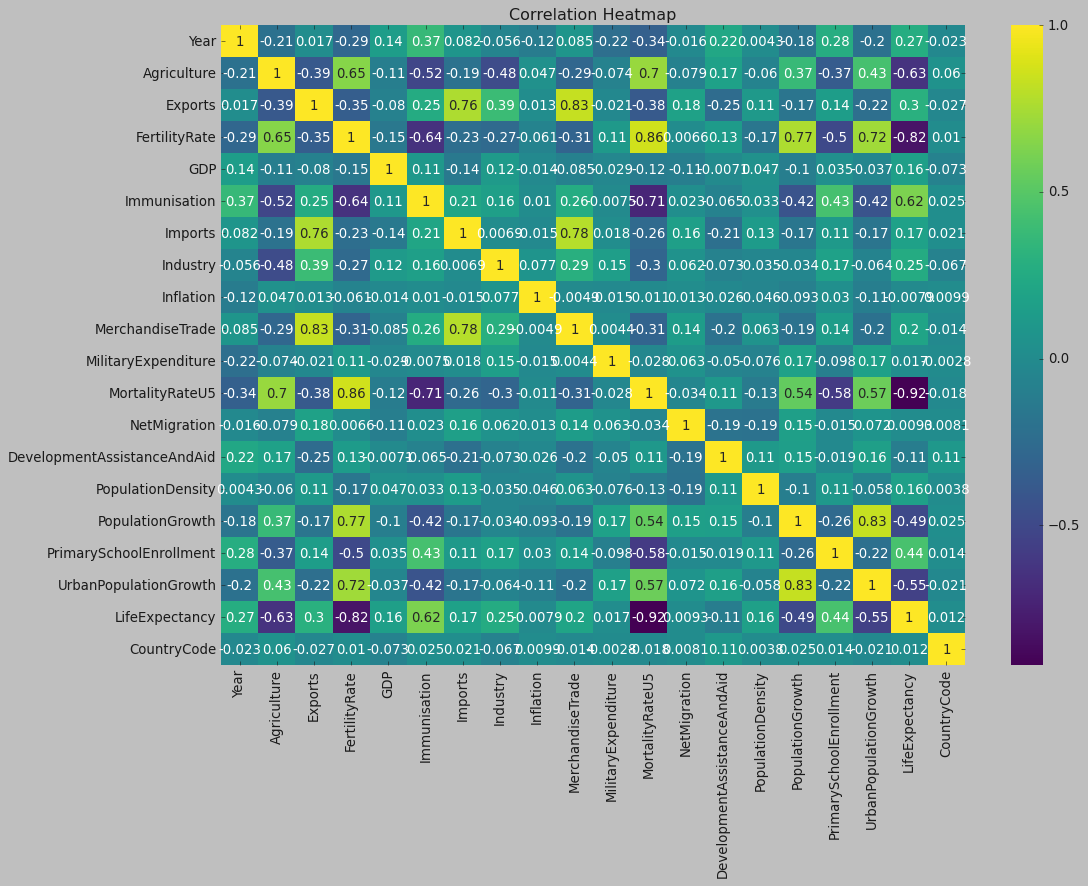

In [351]:
# Using heatmap to show correlations

plt.figure(figsize=(15,10))
sns.heatmap(data= df.corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

#### Exploring correlations between features by graphing corrwith()

In [352]:
# Defining X and Y
X = df.drop(['LifeExpectancy'], axis = 1)
y = df['LifeExpectancy']

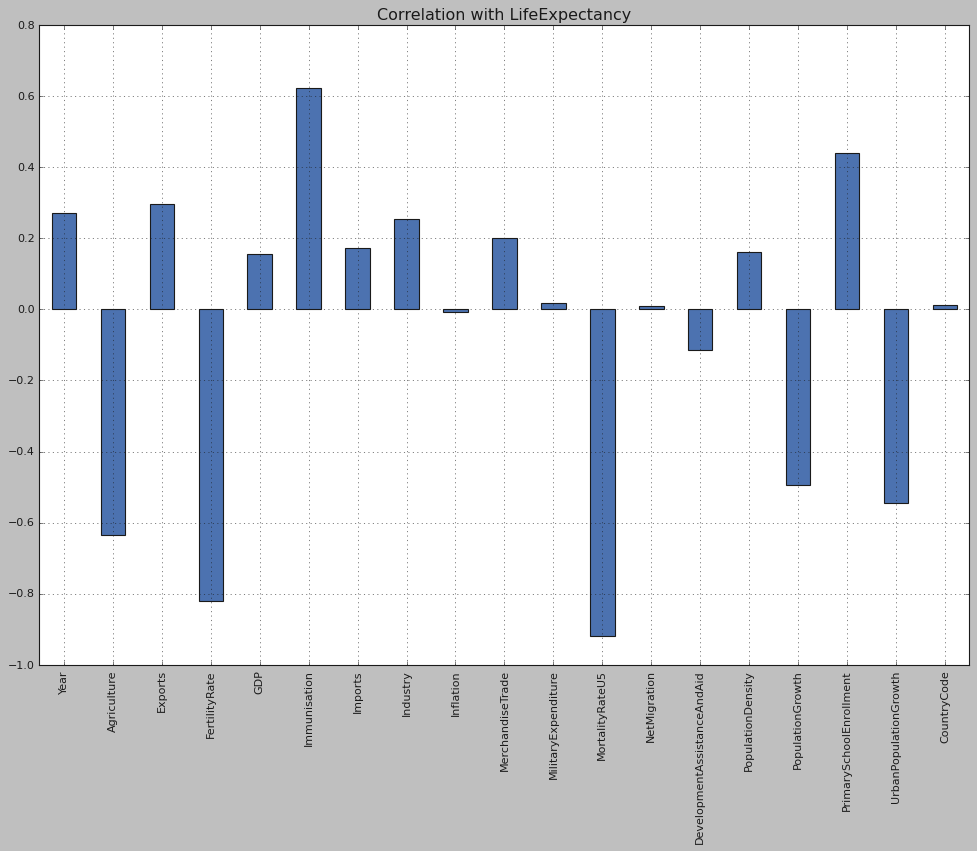

In [353]:
# Graphing correlation of features against life expectancy

X.corrwith(df.LifeExpectancy).plot.bar(figsize = (15, 10), title = "Correlation with LifeExpectancy", fontsize = 10,grid = True)

plt.show()

#### Exploring the correlation between features using a correlation matrix

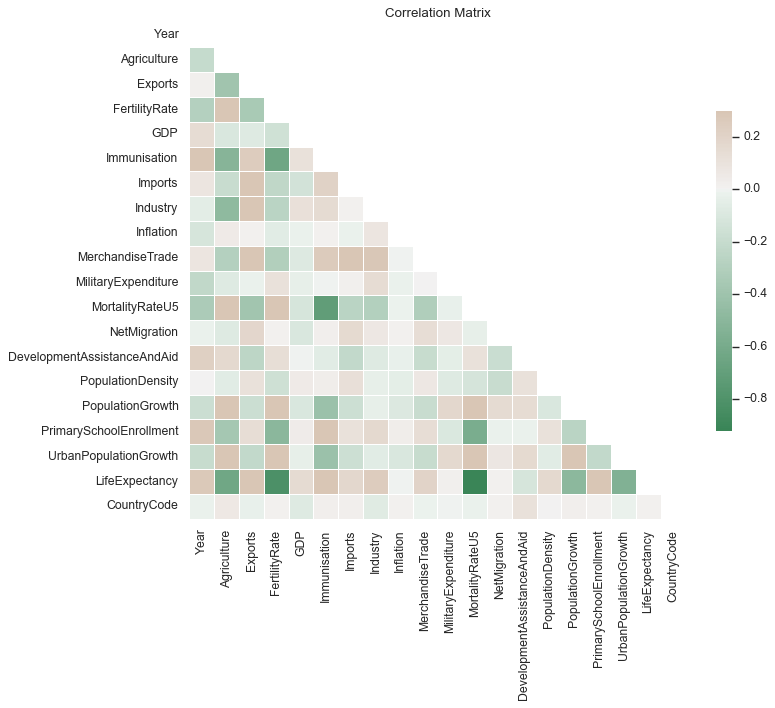

In [354]:
# Correlation matrix

sns.set(style="white")

# Using df.corr() to set up the correlation matrix
corr = df.corr()

# Covering the upper diagonal of the matrix
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Setting up the figure
fig, ax = plt.subplots(figsize=(10, 10))

# Generating a custom diverging colormap
cmap = sns.diverging_palette(500, 40, as_cmap=True)

# Drawing the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix')
plt.show()

#### Summary of correlation between features

The above graphs and displays show the correlation between different features and Life expectancy. By visual inspection of the heatmap, barchart and matrix, it can be observed that the features MortalityRateU5 and FertilityRate are most correlated with Life expectancy. 

## 7. Training a Logistic Regression model

#### Training and evaluating a Logistic Regression model using all available features

In [404]:
# Importing the train_test_split package

from sklearn.model_selection import train_test_split

In [405]:
# Changing Life expectancy to a categorical value so a logistic regression model can be built

df1 = df
df1['LifeExpectancy'] = df1['LifeExpectancy'].astype('int')

In [406]:
# Displaying the head of the dataset

df1.head()

,Year,Agriculture,Exports,FertilityRate,GDP,Immunisation,Imports,Industry,Inflation,MerchandiseTrade,MilitaryExpenditure,MortalityRateU5,NetMigration,DevelopmentAssistanceAndAid,PopulationDensity,PopulationGrowth,PrimarySchoolEnrollment,UrbanPopulationGrowth,LifeExpectancy,CountryCode
0,1985,7.634307,11.736098,3.095,8.815089e+10,54.0,6.273327,39.276155,607.447498,13.851250,2.299717,30.6,31967.0,3.908000e+07,11.067060,1.513403,106.174377,2.004979,69,3
1,1986,7.800403,8.161978,3.075,1.060000e+11,87.0,6.324055,37.380435,77.292237,10.933920,2.313679,29.6,32496.0,7.367000e+07,11.235590,1.511328,107.024521,1.988796,70,3
2,1987,8.094358,7.873206,3.059,1.090000e+11,80.0,7.575764,37.828675,127.539918,11.191895,2.284387,29.1,32345.0,8.339000e+07,11.406646,1.510974,107.391808,1.975691,70,3
3,1988,8.977868,9.531613,3.042,1.270000e+11,87.0,6.211846,38.486611,381.246344,11.393312,2.124939,29.0,30243.0,1.424800e+08,11.579971,1.508087,107.966347,1.961376,71,3
4,1990,8.123676,10.359537,3.034,1.410000e+11,93.0,4.631322,36.021881,2078.316818,11.622706,1.450909,28.8,6021.0,1.716300e+08,11.925961,1.456403,106.912430,1.883831,71,3


In [407]:
# Splitting the dataset - testing size of 20% - randomstate = 42

train, test = train_test_split(df1, test_size = 0.2, random_state = 42)
print(train.shape)
print(test.shape)

(2283, 20)
(571, 20)


In [408]:
# Getting input data and targets for building prediction model

X_train = train.drop(['LifeExpectancy'], axis=1)
y_train = train['LifeExpectancy']
X_test = test.drop(['LifeExpectancy'], axis=1)
y_test = test['LifeExpectancy']

In [409]:
# Printing the shape of the training and testing sets

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (2283, 19)
X_test shape:  (571, 19)
y_train shape:  (2283,)
y_test shape:  (571,)


In [410]:
# Importing the Logistic Regression Model

from sklearn.linear_model import LogisticRegression

In [411]:
# Training the Logistic Regression Model to predict 'rating' bsed on other features

clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [412]:
# Importing the accuracy_score package

from sklearn.metrics import accuracy_score

In [413]:
# Evaluating the accuracy of the model

y_pred = clf.predict(X_test)
print("Accuracy of Logistic Regression Model: ", accuracy_score(y_test, y_pred))

Accuracy of Logistic Regression Model:  0.03327495621716287


In [414]:
# Applying K-folds cross validation to evaluate the performance of the model
 
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator= clf, X=X_train, y=y_train, cv=10)
accuracies.mean()
accuracies.std()
print('CV Accuracy of Logistic Regression Model: %0.3f (+/- %0.3f)' % (accuracies.mean(), accuracies.std()*2))

CV Accuracy of Logistic Regression Model: 0.028 (+/- 0.032)


## 8. Using RFE to improve Logistic Regression model

Using Recursive Feature Elimination to improve the model

In [415]:
# Importing RFE package

from sklearn.feature_selection import RFE

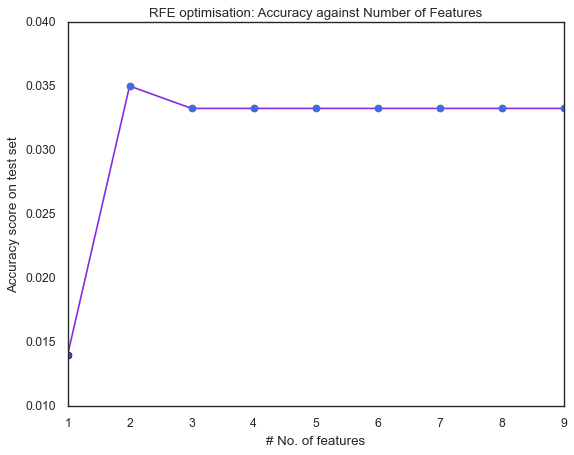

In [416]:
# Using RFE to optimise number of features

estimator = LogisticRegression()
acc_scores = []
for i in range(1, 10):
    selector = RFE(estimator,n_features_to_select=i)
    selector = selector.fit(X_train, y_train)
    supp = selector.get_support()

    predicted = selector.predict(X_test)
    acc_score = accuracy_score(y_test, predicted)
    acc_scores.append(acc_score)

best = 1
for item in acc_scores:
    if item < acc_scores[best - 1]:
        best = acc_scores.index(item) + 1

plt.grid()
plt.xlabel('# No. of features')
plt.ylabel('Accuracy score on test set')
plt.plot(range(1, 10), acc_scores, marker = 'o', color = 'blueviolet', markeredgewidth = 1 ,markeredgecolor = 'royalblue', markerfacecolor = 'royalblue')
plt.plot(best, acc_scores[best-1], marker = 'o', markerfacecolor = 'blueviolet')
plt.grid()
plt.title('RFE optimisation: Accuracy against Number of Features')
plt.show()

From the above graph it can be observed that the optimal number of features for the Logistic Regression Model is 2.

Training the Logistic Regression Model using RFE to select 2 features.

In [418]:
# Selecting the 2 best features 
rfe = RFE(clf, n_features_to_select= 2)
rfe = rfe.fit(X_train, y_train)

# Summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
X_train.columns[rfe.support_]

[False False False False  True False False False False False False False
 False  True False False False False False]
[ 3 14 12 15  1  6 10 13 11  8 17  7  2  1  4 18  5 16  9]


Index(['GDP', 'DevelopmentAssistanceAndAid'], dtype='object')

In [419]:
# Summarising all features

for i in range(X_train.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected False, Rank: 3.000
Column: 1, Selected False, Rank: 14.000
Column: 2, Selected False, Rank: 12.000
Column: 3, Selected False, Rank: 15.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected False, Rank: 6.000
Column: 6, Selected False, Rank: 10.000
Column: 7, Selected False, Rank: 13.000
Column: 8, Selected False, Rank: 11.000
Column: 9, Selected False, Rank: 8.000
Column: 10, Selected False, Rank: 17.000
Column: 11, Selected False, Rank: 7.000
Column: 12, Selected False, Rank: 2.000
Column: 13, Selected True, Rank: 1.000
Column: 14, Selected False, Rank: 4.000
Column: 15, Selected False, Rank: 18.000
Column: 16, Selected False, Rank: 5.000
Column: 17, Selected False, Rank: 16.000
Column: 18, Selected False, Rank: 9.000


In [420]:
# Creating RFE optimised Logistic Regression Model

lr_model = LogisticRegression()
rfe = RFE(estimator=lr_model, n_features_to_select=2, step=1)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=2)

In [421]:
# Evaluating accuracy of RFE Logistic Regression Model

y_pred = rfe.predict(X_test)
print("Accuracy of RFE Logistic Regression Model: ", accuracy_score(y_test, y_pred)) 

Accuracy of RFE Logistic Regression Model:  0.03502626970227671


In [422]:
# Evaluating accuracy of RFE Logistic Regression Model using Cross Validation

accuracies = cross_val_score(estimator= rfe, X=X_train, y=y_train, cv=10)
accuracies.mean()
accuracies.std()
print('CV Accuracy of RFE Logistic Regression Model: %0.3f (+/- %0.3f)' % (accuracies.mean(), accuracies.std()*2))

CV Accuracy of RFE Logistic Regression Model: 0.031 (+/- 0.038)


#### Comparison of Logistic Regression Model before and after using Recursive Feature Elimination

Accuracy of the Logistic Regression Model for predicting life expectancy using all features:
* Accuracy of Logistic Regression:  0.03327495621716287
* CV Accuracy of Logistic Regression Model: 0.028 (+/- 0.032)

Accuracy of Logistic Regression Model for predicting life expectancy using RFE:
* Accuracy of RFE Logistic Regression Model:  0.03502626970227671
* CV Accuracy of RFE Logistic Regression Model: 0.031 (+/- 0.038)

Whilst Recursive Feature Elimination has improved the accuracy of the model slightly, these accuracy scores are very poor and these models will not be able to accurately predict life expectancy.

RFE selects features that are most correlated to life expectancy, and these are not necessarily the same features/combination of features that are most useful in improving the accuracy of the model.

## 9. Using Feature Importance to improve Logistic Regression model

Using feature importance to select the two features that are most useful for improving the accuracy of the Logistic Regression Model. 

In [423]:
# Changing Life expectancy to a categorical value so a logistic regression model can be built

df1 = df
df1['LifeExpectancy'] = df1['LifeExpectancy'].astype('int')

In [424]:
# Populating the X_train, y_train, X_test and y_test variables

X_train = train.drop(['LifeExpectancy'], axis=1)
y_train = train['LifeExpectancy']
X_test = test.drop(['LifeExpectancy'], axis=1)
y_test = test['LifeExpectancy']

In [425]:
# Improting the ExtraTreesClassifier package

from sklearn.ensemble import ExtraTreesClassifier

[0.05845921 0.05706117 0.04693688 0.0687416  0.05230221 0.04740636
 0.04467728 0.04956704 0.03620375 0.04625071 0.05074408 0.09519615
 0.04557295 0.04388962 0.05821957 0.05140577 0.05008641 0.05248027
 0.04479898]


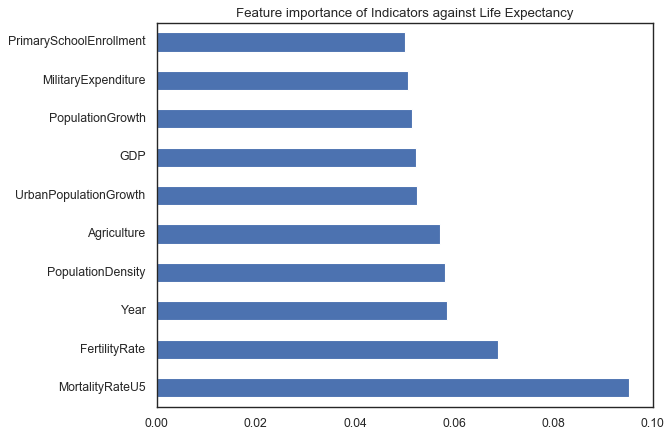

In [426]:
# Using tree based classifier to find the 10 most important features of the dataset for predicting 'LifeExpectancy'

model = ExtraTreesClassifier()
model.fit(X_train,y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Feature importance of Indicators against Life Expectancy')
plt.show()

The above graph identifies the two features most related to improved accuracy scores as MortalityRateU5 and FertilityRate.

In [427]:
# Separating dataframe into data and target
    
data = df[["MortalityRateU5", "Immunisation"]]
target = df['LifeExpectancy']

In [428]:
# Splitting the dataset - testing size of 20% - randomstate = 42

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 42)

In [429]:
# Printing the shape of the training and testing sets

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (2283, 2)
X_test shape:  (571, 2)
y_train shape:  (2283,)
y_test shape:  (571,)


In [430]:
# Training the Logistic Regression Model to predict 'life expectancy' based on 'MortalityRateU5' and 'FertilityRate'

clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [431]:
# Evaluating the accuracy of the feature selected Logistic Regression Model

y_pred = clf.predict(X_test)
print("Accuracy of Feature selected Logistic Regression: ", accuracy_score(y_test, y_pred))

Accuracy of Feature selected Logistic Regression:  0.12609457092819615


In [432]:
# Evaluating accuracy of feature selected Logistic Regression Model using Cross Validation

accuracies = cross_val_score(estimator= clf, X=X_train, y=y_train, cv=10)
accuracies.mean()
accuracies.std()
print('CV Accuracy of Feature selected Logistic Regression: %0.3f (+/- %0.3f)' % (accuracies.mean(), accuracies.std() * 2))

CV Accuracy of Feature selected Logistic Regression: 0.148 (+/- 0.043)


#### Comparison of Logistic Regression, RFE Logistic Regression and Tree Based Classifier Feature Selection Logistic Regression Models

Accuracy of the Logistic Regression Model for predicting life expectancy using all features:

* Accuracy of Logistic Regression: 0.03327495621716287
* CV Accuracy of Logistic Regression Model: 0.028 (+/- 0.032)

Accuracy of Logistic Regression Model for predicting life expectancy using RFE:

* Accuracy of RFE Logistic Regression Model: 0.03502626970227671
* CV Accuracy of RFE Logistic Regression Model: 0.031 (+/- 0.038)

Accuracy of Logistic Regression Model for predicting life expectancy using Tree Based Classifier Feature Selection:

* Accuracy of Feature selected Logistic Regression:  0.12609457092819615
* CV Accuracy of Feature selected Logistic Regression: 0.148 (+/- 0.043)

Using a Tree Based Classifier to select features that directly relate to improved model accuracy has improved the model. The RFE Logistic Regression Model had an accuracy of 0.03502626970227671, and this Feature Selected Logistic Regression Model has a greatly improved accuracy of 0.12609457092819615.

Despite the seemingly significant increase in accuracy between these two models, the improved accuracy of 0.126 is still very poor for a machine learning model.

So far, the TreeBasedClassifier Feature Selected Logistic Regression Model has the highest accuracy (0.12609457092819615).

However, Logistic Regression Models will not be able to accurately predict life expectancy based on the available features.

## 10. Training a KNN model

In [433]:
# Importing the KNN model package

from sklearn.neighbors import KNeighborsClassifier

In [434]:
# Separating dataframe into data and target

data = df.drop(columns = ['LifeExpectancy'])
target = df['LifeExpectancy']

In [436]:
# Splitting the dataset - 20% test size - randomstate = 42

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state=42)

In [437]:
# Printing the shape of the training and testing data

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (2283, 19)
y_train shape: (2283,)
X_test shape: (571, 19)
y_test shape: (571,)


In [440]:
# Training the KNN model - a k-value of 3 has been chosen in an ad-hoc manner

clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [442]:
# Evaluating the accuracy of the KNN model

y_pred = clf_knn.predict(X_test)
print("Accuracy of KNN with k-value of 3: ", accuracy_score(y_test, y_pred))

Accuracy of KNN with k-value=3:  0.06304728546409807


In [444]:
# Evaluating the accuracy of the KNN model using CV

accuracies = cross_val_score(estimator= clf_knn, X=X_train, y=y_train, cv=10)
accuracies.mean()
accuracies.std()
print('CV Accuracy of KNN with k-value of 3: %0.3f (+/- %0.3f)' % (accuracies.mean(), accuracies.std() * 2))

CV Accuracy of KNN with k-value of 3: 0.081 (+/- 0.037)


#### Comparison of KNN Model to previous models

Accuracy of the KNN Model with k-value of 3 for predicting life expectancy using all features:

* Accuracy of KNN with k-value=3:  0.06304728546409807
* CV Accuracy of KNN with k-value of 3: 0.081 (+/- 0.037)

This KNN model has a lower accuracy score than the Feature Selected Logistic Regression Model from step 9.

The KNN model has an accuracy of 0.06304728546409807, and the best performing Logistic Regression Model has an accuracy of 0.12609457092819615.

So far, the TreeBasedClassifier Feature Selected Logistic Regression Model has the highest accuracy (0.12609457092819615).

The performance of a K-Nearest Neighbors Model is highly dependent on the k-value selected. Tuning the hyperparameter k should improve the accuracy of the KNN model. 

## 11. Optimising KNN model by tuning hyperparameter k

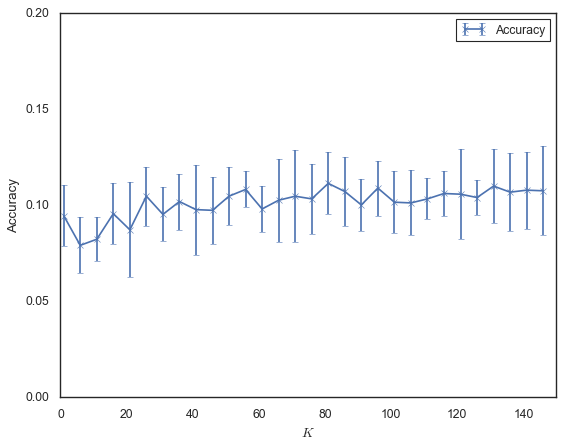

In [445]:
# Using cross validation to plot optimal k-values for the KNN model

cv_scores = []
cv_scores_std = []
k_range = range(1, 150, 5)
for i in k_range:
    clf = KNeighborsClassifier(n_neighbors = i)
    scores = cross_val_score(clf, data, target, scoring='accuracy', cv=KFold(n_splits=10, shuffle=True))
    cv_scores.append(scores.mean())
    cv_scores_std.append(scores.std())

# Plot the relationship
plt.errorbar(k_range, cv_scores, yerr=cv_scores_std, marker='x', label='Accuracy')
plt.ylim([0.1, 1.1])
plt.xlabel('$K$')
plt.ylabel('Accuracy')
plt.xlim(0, 150)
plt.ylim(0, 0.2)
plt.legend(loc='best')
plt.show()

The above graph plots the accuracy of the KNN model for k-values between 0 - 150. The vertical bars at each datapoint represent the standard deviation of that k-value. 

The accuracy of the model can vary greatly depending on what k-value is selected.

The optimal hyperparameter value for k can either be selected manually by observation or by using GridSearch CV.

#### Using GridSearch CV to find optimal hyperparameter k

In [446]:
# Importing GridSearch

from sklearn.model_selection import GridSearchCV

In [450]:
# Using GridSearch to find the optimal value of the hyper-parameter K - Optimal value will be selected within 1 - 150

parameters = {'n_neighbors': range(1, 150, 5)}
knn = KNeighborsClassifier()
gridSearch = GridSearchCV(knn, parameters, scoring='accuracy', cv=KFold(n_splits=10, shuffle=True))
gridSearch.fit(data, target)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 150, 5)}, scoring='accuracy')

In [451]:
# Finding the optimal K value

gridSearch.best_params_

{'n_neighbors': 146}

In [452]:
# Finding the best accuracy score of the model

gridSearch.best_score_

0.11073119862593547

In [455]:
# Training the new KNN model with k value = 146
clf_knn = KNeighborsClassifier(n_neighbors=146)
clf_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=146)

In [457]:
# Evaluating the accuracy of the KNN model with optimised hyperparameter k

y_pred = clf_knn.predict(X_test)
print("Accuracy of KNN with optimised hyperparameter k: ", accuracy_score(y_test, y_pred))

Accuracy of KNN with optimised hyperparameter k:  0.11733800350262696


In [458]:
# Evaluating the accuracy of the KNN model with optimised hyperparameter k using CV

accuracies = cross_val_score(estimator= clf_knn, X=X_train, y=y_train, cv=10)
accuracies.mean()
accuracies.std()
print('CV Accuracy of KNN with optimised hyperparameter k: %0.3f (+/- %0.3f)' % (accuracies.mean(), accuracies.std() * 2))

CV Accuracy of KNN with optimised hyperparameter k: 0.098 (+/- 0.035)


#### Comparison of KNN models to previously trained models

Accuracy of the KNN Model with k-value of 3 for predicting life expectancy using all features:
* Accuracy of KNN with k-value=3:  0.06304728546409807
* CV Accuracy of KNN with k-value of 3: 0.081 (+/- 0.037)

Accuracy of the KNN Model with optimised hyperparameter k for predicting life expectancy using all features:
* Accuracy of KNN with optimised hyperparameter k:  0.11733800350262696
* CV Accuracy of KNN with optimised hyperparameter k: 0.098 (+/- 0.035)

Optimising the hyperparameter value k using GridSearchCV has increased the accuracy of the KNN model. The KNN model's accuracy has increased from 0.06304728546409807 to 0.11733800350262696.

However, these accuracy values are still very low and will not be able to accurately predict life expectancy.

The best performing model out of those tried previously still remains the Feature Selected Logistic Regression Model with an accuracy of 0.12609457092819615.

## 12. Building Gaussian Naive Bayes Classifier Models

Gaussian Naive Bayes algorithm for classification can be applied to datasets where features are continuous. 

The likelihood of the features is assumed to be Gaussian:

##### $$P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)$$

The parameters $\sigma_y$ and $\mu_y$  are estimated using maximum likelihood.

Training a GaussianNB Classifier Model using all features.

In [492]:
# Importing GaussianNB and make_classification packages

from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB

In [493]:
# Separating dataframe into data and target

data = df.drop(columns = ['LifeExpectancy'])
target = df['LifeExpectancy']

In [494]:
# Splitting the dataset - 20% test size - randomstate = 42

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 42)

In [495]:
# Creating and training a Gaussian Naive Bayes Classifier Model

clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [496]:
# Using the GaussianNB model to predict testing data

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print('Accuracy of GaussianNB Model: %.4f\n' % accuracy)

Accuracy of GaussianNB Model: 0.0333



In [501]:
# Evaluating the accuracy of the GaussianNB Model

accuracies = cross_val_score(estimator= clf, X=X_train, y=y_train, cv=10)
accuracies.mean()
accuracies.std()
print('CV Accuracy of GaussianNB Model: %0.3f (+/- %0.3f)' % (accuracies.mean(), accuracies.std() * 2))

CV Accuracy of GaussianNB Model: 0.049 (+/- 0.031)


In [502]:
# Use 10-fold cross validation to show a more robust prediction accuracy

clf = GaussianNB()
scores = cross_val_score(clf, X=X_train, y=y_train, scoring='accuracy', cv=10)
print('Gaussian Naive Bayes accuracy range: [%.3f, %.3f]; mean: %.3f; std: %.3f\n' % (scores.min(), scores.max(), scores.mean(), scores.std()*2))

Gaussian Naive Bayes accuracy range: [0.031, 0.079]; mean: 0.049; std: 0.031



Training a GaussianNB Classifier Model using 2 most relevant features selected by Tree Based Classifier in step 9.

In [503]:
# Separating dataframe into data and target
    
data = df[["MortalityRateU5", "Immunisation"]]
target = df['LifeExpectancy']

In [504]:
# Splitting the dataset - 20% test size - randomstate = 42

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state = 42)

In [505]:
# Creating and training a Gaussian Naive Bayes Classifier Model using 2 selected features

clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [506]:
# Using the GaussianNB Model with 2 features to predict testing data

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print('Accuracy of Feature selected GaussianNB Model: %.4f\n' % accuracy)

Accuracy of Feature selected GaussianNB Model: 0.1611



In [507]:
# Evaluating the accuracy of the GaussianNB Model with selected features

accuracies = cross_val_score(estimator= clf, X=X_train, y=y_train, cv=10)
accuracies.mean()
accuracies.std()
print('CV Accuracy of Feature selected GaussianNB Model: %0.3f (+/- %0.3f)' % (accuracies.mean(), accuracies.std() * 2))

CV Accuracy of Feature selected GaussianNB Model: 0.172 (+/- 0.052)


In [509]:
# Use 10-fold cross validation to show a more robust prediction accuracy

clf = GaussianNB()
scores = cross_val_score(clf, X=X_train, y=y_train, scoring='accuracy', cv=10)
print('Gaussian Naive Bayes accuracy range: [%.3f, %.3f]; mean: %.3f; std: %.3f\n' % (scores.min(), scores.max(), scores.mean(), scores.std()*2))

Gaussian Naive Bayes accuracy range: [0.123, 0.206]; mean: 0.172; std: 0.052



#### Comparison of GaussianNB Models to previously trained Logistic Regression Models and KNN Models

Accuracy of Gaussian Naive Bayes Model for predicting life expectancy using all features:
* Accuracy of GaussianNB Model: 0.0333
* CV Accuracy of GaussianNB Model: 0.049 (+/- 0.031)

Accuracy of Gaussian Naive Bayes Model for predicting life expectancy using Tree Based Classifier Feature Selection:
* Accuracy of Feature selected GaussianNB Model: 0.1611
* CV Accuracy of Feature selected GaussianNB Model: 0.172 (+/- 0.052)

Optimising the number of features used to train the GaussianNB model has increased its accuracy. The GaussianNB model's accuracy has increased from 0.0333 to 0.1611.

Training a GaussianNB Model with an optimised number of features has produced the most accuracte model of this portfolio (0.1611), surpassing the previously most accurate model - Feature Selected Logistic Regression Model (0.12609457092819615).

Despite this being the best performing model, its accuracy is still very low and therefore this model will not be able to accurately predict life expectancy.

#### Final Comparisons: Logistic Regression Models, KNN Models and Gaussian Naive Bayes Models

#### Accuracy of all models trained in this portfolio for predicting life expectancy:

Accuracy of the Logistic Regression Model for predicting life expectancy using all features:
* Accuracy of Logistic Regression: 0.03327495621716287
* CV Accuracy of Logistic Regression Model: 0.028 (+/- 0.032)

Accuracy of Logistic Regression Model for predicting life expectancy using RFE:
* Accuracy of RFE Logistic Regression Model: 0.03502626970227671
* CV Accuracy of RFE Logistic Regression Model: 0.031 (+/- 0.038)

Accuracy of Logistic Regression Model for predicting life expectancy using Tree Based Classifier Feature Selection:
* Accuracy of Feature selected Logistic Regression: 0.12609457092819615
* CV Accuracy of Feature selected Logistic Regression: 0.148 (+/- 0.043)

Accuracy of KNN Model with k-value of 3 for predicting life expectancy using all features:
* Accuracy of KNN with k-value=3:  0.06304728546409807
* CV Accuracy of KNN with k-value of 3: 0.081 (+/- 0.037)

Accuracy of KNN Model with optimised hyperparameter k for predicting life expectancy using all features:
* Accuracy of KNN with optimised hyperparameter k:  0.11733800350262696
* CV Accuracy of KNN with optimised hyperparameter k: 0.098 (+/- 0.035)

Accuracy of Gaussian Naive Bayes Model for predicting life expectancy using all features:
* Accuracy of GaussianNB Model: 0.0333
* CV Accuracy of GaussianNB Model: 0.049 (+/- 0.031)

Accuracy of Gaussian Naive Bayes Model for predicting life expectancy using Tree Based Classifier Feature Selection:
* Accuracy of Feature selected GaussianNB Model: 0.1611
* CV Accuracy of Feature selected GaussianNB Model: 0.172 (+/- 0.052)


#### Ranking the 3 most accurate models trained:
1. Accuracy of Gaussian Naive Bayes Model for predicting life expectancy using Tree Based Classifier Feature Selection:
    * Accuracy of Feature selected GaussianNB Model: 0.1611
    * CV Accuracy of Feature selected GaussianNB Model: 0.172 (+/- 0.052)  

2. Accuracy of Logistic Regression Model for predicting life expectancy using Tree Based Classifier Feature Selection:
    * Accuracy of Feature selected Logistic Regression: 0.12609457092819615
    * CV Accuracy of Feature selected Logistic Regression: 0.148 (+/- 0.043)
    
    
3. Accuracy of KNN Model with optimised hyperparameter k for predicting life expectancy using all features:
    * Accuracy of KNN with optimised hyperparameter k:  0.11733800350262696
    * CV Accuracy of KNN with optimised hyperparameter k: 0.098 (+/- 0.035)
    
The GaussianNB Model with optimised feature selection is the most accurate model trained in this portfolio. This model has a cross validated accuracy of  0.172 (+/- 0.052). The next best models are the feature selected Logistic Regression Model and KNN Model with optimised hyper parameter k, with cross validated accuracies of 0.148 (+/- 0.043) and 0.098 (+/- 0.035) respectively.

Despite the improvements made to each model throughout this portfolio, the most accurate model trained with an accuracy of 0.1611 will still be unable to effectively predict life expectancy based on the available features.